<h1 style='background:#00BFFF; color:Black'><Center><br> <u>Lead Scoring Case Study </Center></h1>

### Table of Content <a id="0"></a>

01. [Introduction](#1)
02. [Problem Statement](#2)
03. [Data Cleaning and Pre-processing](#3)
04. [Feature Engineering](#3)
05. [Data Analysis and Visualization](#4)
06. [Conclusion](#6)
07. [Recommendations](#7)

***

<a id="1"></a> <h1 style='background:#e3e3e1; color:Black'><Left><br>[01. <u>Introduction](#0)<br></Left></h1>

_An education company named **X Education** sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses._<br>

<a id="2"></a> <h1 style='background:#e3e3e1; color:Black'><Left><br>[02. <u>Problem Statement](#0)<br></Left></h1>

_X Education gets a lot of leads, but its **lead conversion rate is very poor, typically lead conversion rate is around 30%.** <br> 
For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as **‘Hot Leads’**._<br>
<br>
**Goals of the Case Study**<br>
> **_Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted._**


### **2.1** : Disabling Python Warnings

In [1]:
#Ignore Warnings
import warnings as war
war.filterwarnings('ignore')

### **2.2** : Importing Libraries

In [3]:
# Importing all important libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **2.3** : Importing required Dataset for EDA

In [5]:
# Loading the required dataset and checking its top 5 rows

Lead_df = pd.read_csv('Dataset\Leads.csv')
Lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### **2.4** : Checking various stats of our Dataset

In [7]:
# Checking Shape of our Dataset
Lead_df.shape

(9240, 37)

>**Insight,**
>- __We can see, there are around 9240 Rows and 37 Columns in our Dataset.__

In [9]:
# Checking information about the Dataset and its Datatype.
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

>**Insight,**
>- As per the data dictionary, We can Drop **`Prospect ID`**, as it's an unique ID with which the customer is identified.
>- Similarly , **`Lead Number`** is a unique lead number assigned to each generated lead.


### **2.5** : Checking Descriptive Statistical Summary of our Dataset

In [11]:
# Checking Descriptive statistical summary of all the variables in our dataset
Lead_df.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,...,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,...,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,...,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,...,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,...,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,...,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


>**Insight,**<br>
>- __From the Descriptive Summary of all the variables we can see that:__
>- There are few Categorical Columns, that contains only one type of value in the entire dataset, thus we can drop them as they are not contributing in our analysis.
>- Also, there are few Categorical Columns, that contains only Binary Data. Thus we can encode them with 0 and 1, integers for Model building.

<a id="3"></a> <h1 style='background:#e3e3e1; color:Black'><Left><br>  [03. <u>Data Cleaning and Pre-processing](#0) </br></Left></h1>

### **3.1** : Droping **`Prospect ID`** and **`Lead Number`** as per data dictionary

In [13]:
# Droping `Prospect ID` and `Lead Number` columns
Lead_df.drop(['Prospect ID','Lead Number'], axis=1, inplace=True)


### **3.2** : Removing Case Mis-match

In [15]:
# Creating New Function to convert alphabetic characters to uppercase
def to_uppercase_alpha(val):
    if isinstance(val, str):
        return ''.join([char.upper() if char.isalpha() else char for char in val])
    return val

In [17]:
# Removing case mis-match by Standardizing all the values of string type to Uppercase() using the defined Function
Lead_df = Lead_df.map(lambda x: to_uppercase_alpha(x) if isinstance(x, str) else x)


### **3.3** : Checking variables having only 1 type of value in the dataset and Droping them

In [19]:
# Checking variables having only 1 type of value in the dataset and storing them in a list. 
uni_var = []
for col in Lead_df.columns:
    if Lead_df[col].nunique() == 1 :
        print(f' {Lead_df[col].dtype} variable with only {Lead_df[col].nunique()} value is : {col}' )
        uni_var.append(col)
    else: pass 
print(f'\n', uni_var)

 object variable with only 1 value is : Magazine
 object variable with only 1 value is : Receive More Updates About Our Courses
 object variable with only 1 value is : Update me on Supply Chain Content
 object variable with only 1 value is : Get updates on DM Content
 object variable with only 1 value is : I agree to pay the amount through cheque

 ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


In [21]:
# Droping all the columns, that having only 1 type of value in Dataset
Lead_df.drop(uni_var, axis=1, inplace=True)

# Checking Shape of the dataset
Lead_df.shape

(9240, 30)

### **3.4** : Checking categorical variables having Binary values in the dataset and storing them in a list.

In [23]:
# Checking all the Cartegorical Cloumns having Binary Values in our dataset and having Object Datatype

bi_var = []
for col in Lead_df.columns:
    if Lead_df[col].nunique() == 2 and Lead_df[col].dtype == 'O' :
        print(f' {Lead_df[col].dtype} variable with binary ({Lead_df[col].nunique()}) values is : {col}' )
        bi_var.append(col)
    else: pass 
print(f'\n', bi_var)

 object variable with binary (2) values is : Do Not Email
 object variable with binary (2) values is : Do Not Call
 object variable with binary (2) values is : Search
 object variable with binary (2) values is : Newspaper Article
 object variable with binary (2) values is : X Education Forums
 object variable with binary (2) values is : Newspaper
 object variable with binary (2) values is : Digital Advertisement
 object variable with binary (2) values is : Through Recommendations
 object variable with binary (2) values is : A free copy of Mastering The Interview

 ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']


> **Insight,**
>- As we can see there are 9 Categorical Variables having binary values.
>- Now, Let's keep them as it is for easy Exploratory Data Analysis. and Then Encoding then into 0 and 1 integers for Model building.

### **3.5** : Replacing 'Select' with 'Null value'

In [25]:
# Replacing 'SELECT' value in the dataset with `Null value` as per data dictionary
Lead_df = Lead_df.map(lambda x: None if x=='SELECT' else x)

### **3.6** : Checking for Duplicates Rows Entires & Droping them

In [27]:
# Checking for Duplicate Entires in our Dataset
Lead_df.duplicated().sum()

1281

In [29]:
# Droping all the Duplicate Rows
Lead_df.drop_duplicates(inplace=True)

### **3.7** Checking Missing Values in the Dataset

In [31]:
# Checking null values and its percentage in our Dataset

Missing_df = pd.DataFrame({'Null_Count' : Lead_df.isnull().sum().sort_values(ascending = False) ,
                           'Null_Percent': (Lead_df.isnull().sum()/len(Lead_df)*100).sort_values(ascending = False) })
Missing_df

,Null_Count,Null_Percent
How did you hear about X Education,5969,74.996859
Lead Profile,5721,71.880890
Lead Quality,3705,46.551074
Asymmetrique Profile Score,3515,44.163840
Asymmetrique Activity Score,3515,44.163840
Asymmetrique Profile Index,3515,44.163840
Asymmetrique Activity Index,3515,44.163840
City,2411,30.292750
Tags,2402,30.179671
Specialization,2190,27.516020


>**Insight,**
>- As there are many **`Null values`** in our dataset, by Imputing them we can skew the results and accuracy of the Machine Learning Model. 
>- Thus, we can drop all the columns having more than **`30% Null values`.**

### **3.8** : Dropping Columns with more than 30% missing values

In [34]:
# Checking all the column names with more than 30% missing vaules
Missing_df.loc[Missing_df['Null_Percent']>30 , : ].index

Index(['How did you hear about X Education', 'Lead Profile', 'Lead Quality',
       'Asymmetrique Profile Score', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Index', 'City',
       'Tags'],
      dtype='object')

In [36]:
# Dropping Null values with more than 30% missing data

Lead_df.drop( ['How did you hear about X Education', 'Lead Profile', 'Lead Quality',
               'Asymmetrique Profile Score', 'Asymmetrique Activity Score',
               'Asymmetrique Profile Index', 'Asymmetrique Activity Index', 'City',
               'Tags'] , axis=1 , inplace=True)

Lead_df.shape

(7959, 21)

<a id="4"></a><h1 style='background:#e3e3e1; color:Black'><Left><br> [04. <u>Feature Engineering & Handling Missing Values](#0) </br></Left></h1>

In [38]:
# Checking null values greater than 0 and its percentage in our Dataset
Missing_df = pd.DataFrame({'Null_Count' : Lead_df.isnull().sum().sort_values(ascending = False) ,
                           'Null_Percent': (Lead_df.isnull().sum()/len(Lead_df)*100).sort_values(ascending = False) })

Missing_df.loc[Missing_df['Null_Count']>0 , : ]

,Null_Count,Null_Percent
Specialization,2190,27.516020
What matters most to you in choosing a course,1970,24.751853
What is your current occupation,1951,24.513130
Country,1180,14.825983
TotalVisits,137,1.721322
Page Views Per Visit,137,1.721322
Last Activity,103,1.294132
Lead Source,33,0.414625


### **4.1** : Analysis of **`Specialization`** column
- First let's check the total count of missing values and their percentage in **`Specialization`**

In [46]:
# Checking Percentage of Missing Values in 'Specialization' Columns 
Lead_df['Specialization'].isnull().sum()

2190

In [48]:
# Cheking Value Counts of Speciakuzation Columns
Lead_df['Specialization'].value_counts()

Specialization
FINANCE MANAGEMENT                   957
HUMAN RESOURCE MANAGEMENT            831
MARKETING MANAGEMENT                 805
OPERATIONS MANAGEMENT                492
BUSINESS ADMINISTRATION              398
IT PROJECTS MANAGEMENT               366
SUPPLY CHAIN MANAGEMENT              348
BANKING, INVESTMENT AND INSURANCE    333
TRAVEL AND TOURISM                   203
MEDIA AND ADVERTISING                203
INTERNATIONAL BUSINESS               178
HEALTHCARE MANAGEMENT                159
HOSPITALITY MANAGEMENT               114
E-COMMERCE                           112
RETAIL MANAGEMENT                    100
RURAL AND AGRIBUSINESS                73
E-BUSINESS                            57
SERVICES EXCELLENCE                   40
Name: count, dtype: int64

In [50]:
# Feature Engineering  New Categories to map Original specializations
specialization_mapping = {
    'FINANCE MANAGEMENT': 'Management',
    'HUMAN RESOURCE MANAGEMENT': 'Management',
    'MARKETING MANAGEMENT': 'Management',
    'OPERATIONS MANAGEMENT': 'Management',
    'BUSINESS ADMINISTRATION': 'Management',
    
    'IT PROJECTS MANAGEMENT': 'IT & E-Business',
    'E-COMMERCE': 'IT & E-Business',
    'E-BUSINESS': 'IT & E-Business',
    'INTERNATIONAL BUSINESS': 'IT & E-Business',
    
    'SUPPLY CHAIN MANAGEMENT': 'Supply Chain & Operations',
    'SERVICES EXCELLENCE': 'Supply Chain & Operations',
    'RETAIL MANAGEMENT': 'Supply Chain & Operations',
    'RURAL AND AGRIBUSINESS': 'Supply Chain & Operations',
    
    'BANKING, INVESTMENT AND INSURANCE': 'Finance & Banking',
    
    'MEDIA AND ADVERTISING': 'Media & Advertising',
    
    'HEALTHCARE MANAGEMENT': 'Healthcare',
    
    'TRAVEL AND TOURISM': 'Tourism & Hospitality',
    'HOSPITALITY MANAGEMENT': 'Tourism & Hospitality'
}


In [52]:
# Apply the mapping to the 'Specialization' column
Lead_df['Grouped_Specialization'] = Lead_df['Specialization'].map(specialization_mapping)

In [54]:
# To Handle null values let's replace `NaN` with 'Other' as a Category)
Lead_df['Grouped_Specialization'].fillna('Other', inplace=True)

In [56]:
# Droping 'Specialization' Columns as its not required anymore
Lead_df.drop(['Specialization'], axis=1, inplace=True)

In [58]:
# Checking Value Count of Grouped_Specialization
Lead_df['Grouped_Specialization'].value_counts()

Grouped_Specialization
Management                   3483
Other                        2190
IT & E-Business               713
Supply Chain & Operations     561
Finance & Banking             333
Tourism & Hospitality         317
Media & Advertising           203
Healthcare                    159
Name: count, dtype: int64

### **4.2** : Analysis of **`What matters most to you in choosing a course`** column

In [60]:
# Checking Value count of 'What matters most to you in choosing a course'
Lead_df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
BETTER CAREER PROSPECTS      5986
FLEXIBILITY & CONVENIENCE       2
OTHER                           1
Name: count, dtype: int64

In [62]:
# Checking Null values in 'What matters most to you in choosing a course'
Lead_df['What matters most to you in choosing a course'].isna().sum()

1970

In [64]:
# Relpacing Null values with 'other' as Categories
Lead_df['What matters most to you in choosing a course'].fillna('OTHER', inplace=True)

In [66]:
# As Their are only 2 entries as `FLEXIBILITY & CONVENIENCE`, lets replace them as `Other` to avoid data inconsistency
Lead_df.loc[Lead_df['What matters most to you in choosing a course'] == 'FLEXIBILITY & CONVENIENCE' , 'What matters most to you in choosing a course' ] = 'OTHER'

# Again checking Value count for Changes
Lead_df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
BETTER CAREER PROSPECTS    5986
OTHER                      1973
Name: count, dtype: int64

### **4.3** : Analysis of **`What is your current occupation`** column

In [68]:
# Checking Value count of `What is your current occupation`
Lead_df['What is your current occupation'].value_counts()

What is your current occupation
UNEMPLOYED              5150
WORKING PROFESSIONAL     639
STUDENT                  185
OTHER                     16
HOUSEWIFE                 10
BUSINESSMAN                8
Name: count, dtype: int64

In [70]:
# Checking Null values in `What is your current occupation`
Lead_df['What is your current occupation'].isna().sum()

1951

In [72]:
# Replacing null Values with 'OTHER' as category
Lead_df['What is your current occupation'].fillna('OTHER', inplace=True)

# Again checking Value count for Changes
Lead_df['What is your current occupation'].value_counts()

What is your current occupation
UNEMPLOYED              5150
OTHER                   1967
WORKING PROFESSIONAL     639
STUDENT                  185
HOUSEWIFE                 10
BUSINESSMAN                8
Name: count, dtype: int64

### **4.4** : Analysis of **`Country`** column

In [74]:
# Checking Value Count of `Country` Column
Lead_df['Country'].value_counts()

Country
INDIA                   6492
UNITED STATES             69
UNITED ARAB EMIRATES      53
SINGAPORE                 24
SAUDI ARABIA              21
UNITED KINGDOM            15
AUSTRALIA                 13
QATAR                     10
HONG KONG                  7
BAHRAIN                    7
OMAN                       6
FRANCE                     6
UNKNOWN                    5
SOUTH AFRICA               4
NIGERIA                    4
GERMANY                    4
KUWAIT                     4
CANADA                     4
SWEDEN                     3
CHINA                      2
ASIA/PACIFIC REGION        2
UGANDA                     2
BANGLADESH                 2
ITALY                      2
BELGIUM                    2
NETHERLANDS                2
GHANA                      2
PHILIPPINES                2
RUSSIA                     1
SWITZERLAND                1
VIETNAM                    1
DENMARK                    1
TANZANIA                   1
LIBERIA                    1
MALAYS

In [78]:
# Checking null values in Country column
Lead_df['Country'].isna().sum()

1180

In [80]:
# Relpacing null values with `UNKNOWN` as categories
Lead_df['Country'].fillna('UNKNOWN', inplace=True)

In [82]:
# Checking Percentage of `Country` in our data
Lead_df['Country'].value_counts(normalize=True)*100

Country
INDIA                   81.568036
UNKNOWN                 14.888805
UNITED STATES            0.866943
UNITED ARAB EMIRATES     0.665913
SINGAPORE                0.301545
SAUDI ARABIA             0.263852
UNITED KINGDOM           0.188466
AUSTRALIA                0.163337
QATAR                    0.125644
BAHRAIN                  0.087951
HONG KONG                0.087951
OMAN                     0.075386
FRANCE                   0.075386
KUWAIT                   0.050258
SOUTH AFRICA             0.050258
CANADA                   0.050258
NIGERIA                  0.050258
GERMANY                  0.050258
SWEDEN                   0.037693
PHILIPPINES              0.025129
ASIA/PACIFIC REGION      0.025129
ITALY                    0.025129
UGANDA                   0.025129
BANGLADESH               0.025129
NETHERLANDS              0.025129
CHINA                    0.025129
BELGIUM                  0.025129
GHANA                    0.025129
KENYA                    0.012564
SRI LA

**Insight,**
>- As we can see, **81.56%** of Leads are from **`INDIA`** and **14.88%** of Leads are from **`UNKNOWN`** Country.
>- Thus, we can conclude only **3.56%** of Leads are from other countries. So it might be posibble that most of the Leads in **`UNKNOWN`** are from India.
>- Thus, we cannot use **`Country`** column in our analysis are it might Skew our results.

In [84]:
# Thus, Dropping `Country` column from our dataset 
Lead_df.drop(['Country'], axis=1, inplace=True )


### **4.5** : Analysis of **`Page Views Per Visit`** column

In [86]:
# Checking null values of 'Page Views Per Visit' column
Lead_df['Page Views Per Visit'].isna().sum()

137

In [88]:
# Checking `median()` of 'Page Views Per Visit' cloumn
Lead_df['Page Views Per Visit'].median()

2.0

In [90]:
# Replacing null values with median() of the cloumn
Lead_df['Page Views Per Visit'].fillna(Lead_df['Page Views Per Visit'].median(), inplace=True)

### **4.6** : Analysis of **`TotalVisits`** column

In [92]:
# Checking null values of 'TotalVisits' column
Lead_df['TotalVisits'].isna().sum()

137

In [94]:
# Checking 'Median()' of 'TotalVisits' column 
Lead_df['TotalVisits'].median()

3.0

In [96]:
# Replacing Null values with Median() of 'TotalVisits' column
Lead_df['TotalVisits'].fillna(Lead_df['TotalVisits'].median(), inplace=True)


### **4.7** : Analysis of **`Last Activity`** column

In [98]:
# Checking null values of 'Last Activity' column
Lead_df['Last Activity'].isna().sum()

103

In [100]:
# Checking Value Count of 'Last Activity' column
Lead_df['Last Activity'].value_counts()

Last Activity
EMAIL OPENED                    3043
SMS SENT                        2427
PAGE VISITED ON WEBSITE          635
OLARK CHAT CONVERSATION          474
CONVERTED TO LEAD                428
EMAIL BOUNCED                    303
EMAIL LINK CLICKED               225
FORM SUBMITTED ON WEBSITE        116
UNREACHABLE                       93
UNSUBSCRIBED                      61
HAD A PHONE CONVERSATION          30
APPROACHED UPFRONT                 9
VIEW IN BROWSER LINK CLICKED       6
EMAIL RECEIVED                     2
EMAIL MARKED SPAM                  2
VISITED BOOTH IN TRADESHOW         1
RESUBSCRIBED TO EMAILS             1
Name: count, dtype: int64

In [102]:
# Checking Mode() of 'Last Activity' column 
print(Lead_df['Last Activity'].mode().values[0])

EMAIL OPENED


In [104]:
# Replacing Null values with Mode of Column
Lead_df['Last Activity'].fillna(Lead_df['Last Activity'].mode().values[0], inplace=True)

In [106]:
# Checking to total count of 'Last Activity'
Lead_df['Last Activity'].nunique()

17

**Insight,**
>- As we can see, there are **17 uniques Last Activity**, which will later increase categorical columns on our dataset.
>  Thus, we can Group Similar Activities together to reduse the categories

In [109]:
# Grouping similar activities together to reduse the categories by
# Defining the activity_map for grouping
activity_mapping = {
    # Email Activity
    'EMAIL OPENED': 'Email Activity',
    'EMAIL BOUNCED': 'Email Activity',
    'EMAIL LINK CLICKED': 'Email Activity',
    'EMAIL RECEIVED': 'Email Activity',
    'EMAIL MARKED SPAM': 'Email Activity',
    'RESUBSCRIBED TO EMAILS': 'Email Activity',
    'UNSUBSCRIBED': 'Email Activity',
    'VIEW IN BROWSER LINK CLICKED': 'Email Activity',
    
    # Messaging Activity
    'SMS SENT': 'Messaging Activity',
    'OLARK CHAT CONVERSATION': 'Messaging Activity',
    
    # Website Interaction
    'PAGE VISITED ON WEBSITE': 'Website Interaction',
    'FORM SUBMITTED ON WEBSITE': 'Website Interaction',
    
    # Phone & Event Interaction
    'HAD A PHONE CONVERSATION': 'Phone & Event Interaction',
    'APPROACHED UPFRONT': 'Phone & Event Interaction',
    'UNREACHABLE': 'Phone & Event Interaction',
    'VISITED BOOTH IN TRADESHOW': 'Phone & Event Interaction',
    
    # Conversion
    'CONVERTED TO LEAD': 'Conversion',
}


In [111]:
# Apply the mapping to group the activities in 'Last Activity' column
Lead_df['Grouped_Activity'] = Lead_df['Last Activity'].map(activity_mapping)

In [113]:
# Dropping 'Last Activity' Column as it's not required anymore
Lead_df.drop(['Last Activity'], axis=1 , inplace=True)

In [115]:
# Checking value count of 'Grouped_Activity' categories
Lead_df['Grouped_Activity'].value_counts()

Grouped_Activity
Email Activity               3746
Messaging Activity           2901
Website Interaction           751
Conversion                    428
Phone & Event Interaction     133
Name: count, dtype: int64

### **4.8** : Analysis of **`Lead Source`** column

In [118]:
# Checking null values of Lead Source column
Lead_df['Lead Source'].isna().sum()

33

In [120]:
# Checking Value Count of `Lead Source` column
Lead_df['Lead Source'].value_counts()

Lead Source
GOOGLE               2873
DIRECT TRAFFIC       2543
ORGANIC SEARCH       1154
OLARK CHAT            673
REFERENCE             410
REFERRAL SITES        125
WELINGAK WEBSITE       73
FACEBOOK               52
BING                    6
CLICK2CALL              4
SOCIAL MEDIA            2
LIVE CHAT               2
PRESS_RELEASE           2
PAY PER CLICK ADS       1
BLOG                    1
WELEARN                 1
WELEARNBLOG_HOME        1
YOUTUBECHANNEL          1
TESTONE                 1
NC_EDM                  1
Name: count, dtype: int64

In [122]:
# Checking Mode of `Lead Source`
Lead_df['Lead Source'].mode().values[0]

'GOOGLE'

In [124]:
# Replacing null values with Mode of the column
Lead_df['Lead Source'].fillna(Lead_df['Lead Source'].mode().values[0] , inplace=True)

**Insight,**
>- As there are many **`Lead Source`**, which will later increase categorical columns on our dataset. Thus, we can Group Similar Sources together to reduse the categories.

In [127]:
# Now, Reducing the categories by grouping similar sources into one, based on their nature like, search engines, social media, websites, etc.
# Creating source Mapping 
source_mapping = {
    # Search Engines
    'GOOGLE': 'Search_Engines',
    'BING': 'Search_Engines',
    'ORGANIC SEARCH': 'Search_Engines',
    # Direct and Referral Traffic
    'DIRECT TRAFFIC': 'Direct and Referral',
    'REFERRAL SITES': 'Direct and Referral',
    'REFERENCE': 'Direct and Referral',
    # Website and Chat
    'WELINGAK WEBSITE': 'Website and Chat',
    'OLARK CHAT': 'Website and Chat',
    'LIVE CHAT': 'Website and Chat',
    'CLICK2CALL': 'Website and Chat',
    # Social Media
    'FACEBOOK': 'Social Media',
    'SOCIAL MEDIA': 'Social Media',
    'YOUTUBECHANNEL': 'Social Media',
    # Paid Ads and Marketing
    'PAY PER CLICK ADS': 'Paid_Ads_&_Marketing',
    'PRESS_RELEASE': 'Paid_Ads_&_Marketing',
    'NC_EDM': 'Paid_Ads_&_Marketing',
    # Blogs
    'BLOG': 'Blogs',
    'WELEARN': 'Blogs',
    'WELEARNBLOG_HOME': 'Blogs',
    'TESTONE': 'Blogs'
}

In [129]:
# Appling mapping to group the sources
Lead_df['Grouped_Lead_Source'] = Lead_df['Lead Source'].map(source_mapping)

In [131]:
# Dropping 'Lead Source' column as its not required anymore
Lead_df.drop(['Lead Source'], axis=1, inplace=True)

In [133]:
# Now, Checking values Count of 'Grouped_Lead_Source'
Lead_df['Grouped_Lead_Source'].value_counts()

Grouped_Lead_Source
Search_Engines          4066
Direct and Referral     3078
Website and Chat         752
Social Media              55
Blogs                      4
Paid_Ads_&_Marketing       4
Name: count, dtype: int64

### **4.9** : _Now, Let's again check the **`Null Values`** in our Dataset_

In [135]:
# Checking Null Values in our Dataset
Lead_df.isna().sum()

Lead Origin                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
A free copy of Mastering The Interview           0
Last Notable Activity                            0
Grouped_Specialization                           0
Grouped_Activity                                 0
Grouped_Lead_Source            

<a id="5"></a><h1 style='background:#e3e3e1; color:Black'><Left><br> [05. <u>Outlier Analysis of Numeric Variables](#0) </br></Left></h1>

### **5.1** : Firstly, Let's sepreate all the Numerical and Categorical variables names

In [138]:
# Storing all the Numeric Column names into `num_var` variables 
num_var = Lead_df.select_dtypes(include='number').columns
print(num_var)

# Similarly, storing all the Categorical Column names into `cat_var` variables, if any.
cat_var = Lead_df.select_dtypes(exclude='number').columns
print(cat_var)

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')
Index(['Lead Origin', 'Do Not Email', 'Do Not Call',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Grouped_Specialization', 'Grouped_Activity', 'Grouped_Lead_Source'],
      dtype='object')


### **5.2** : Now, let's Visualize the Distribution of data across all Numerical Variables

_Boxplot and Histogram are very useful charts to check for any Outliers in our data and to see the distribution of data, respectively.<br> To make it easy for analysis, let's create a new Function._

In [140]:
# Creating a function for ploting Boxplot and Histogram Graph for Outlier analysis

def plot_box_histogram(column_name):
    plt.figure(figsize=[12,3])
    plt.subplot(1,2,1)
    sns.boxplot(x=column_name)
    plt.title(f"Boxplot of '{column_name.name}' ")

    plt.subplot(1,2,2)
    sns.histplot(x=column_name, kde=True)
    plt.title(f"Distribution of '{column_name.name}' ")
    plt.axvline(column_name.mean(), color='r', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(column_name.median(), color='g', linestyle='dashed', linewidth=1, label='Median')
    plt.legend()

    plt.show()
    print(f'\n')

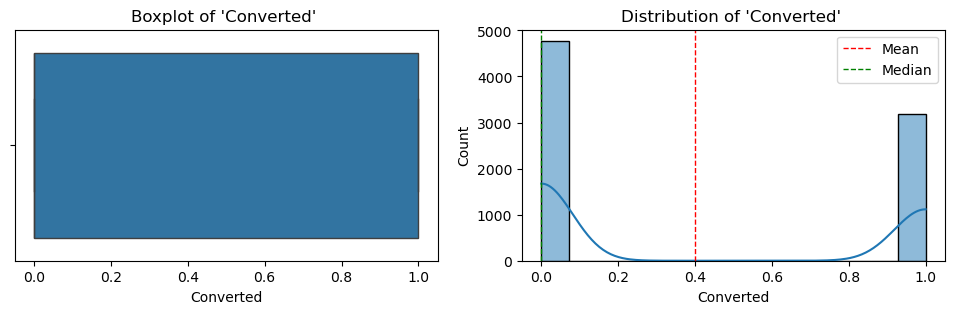

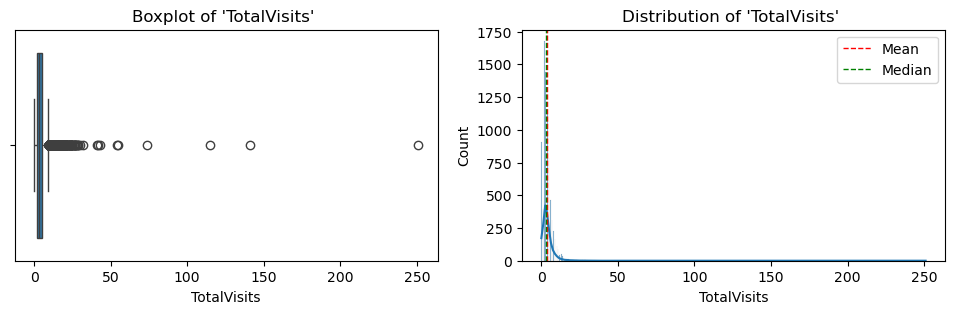

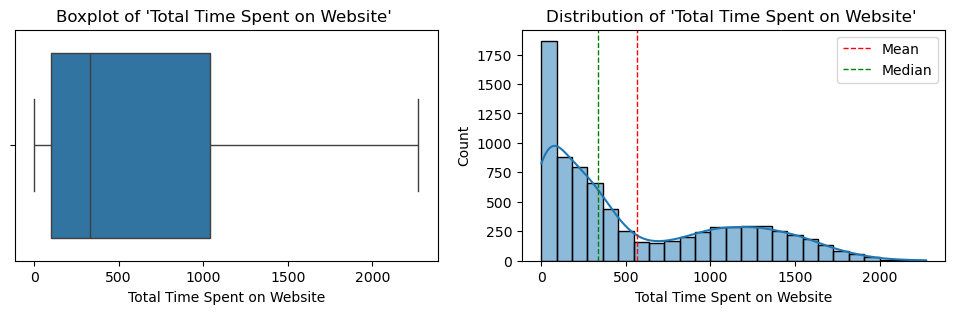

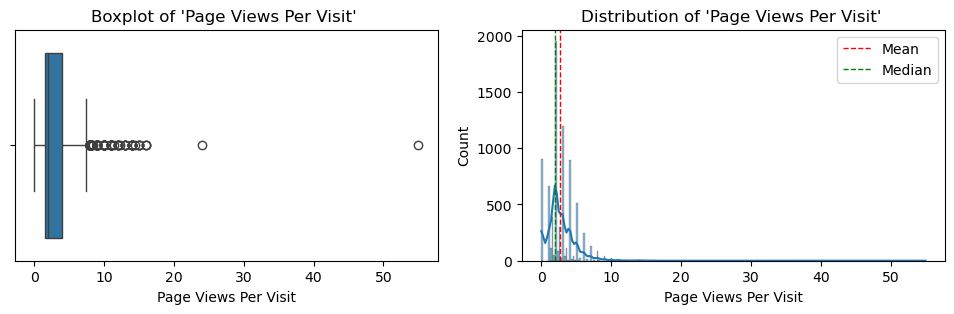

In [142]:
# Now lets Visualize the distribution of Data across all numerical Columns
for col in num_var:
    plot_box_histogram(Lead_df[col])

>**Insight,**
>- From all the above, Boxplot and Histogram charts, we can see there are some Outliers in numeric variables.
>- To get the Accurate analysis and prediction, we need to treat these Outliers before Model Building.

### **5.3** : Let's visualize Percentile Scatterplot of all numeric variables, for better understanding of Outliers.

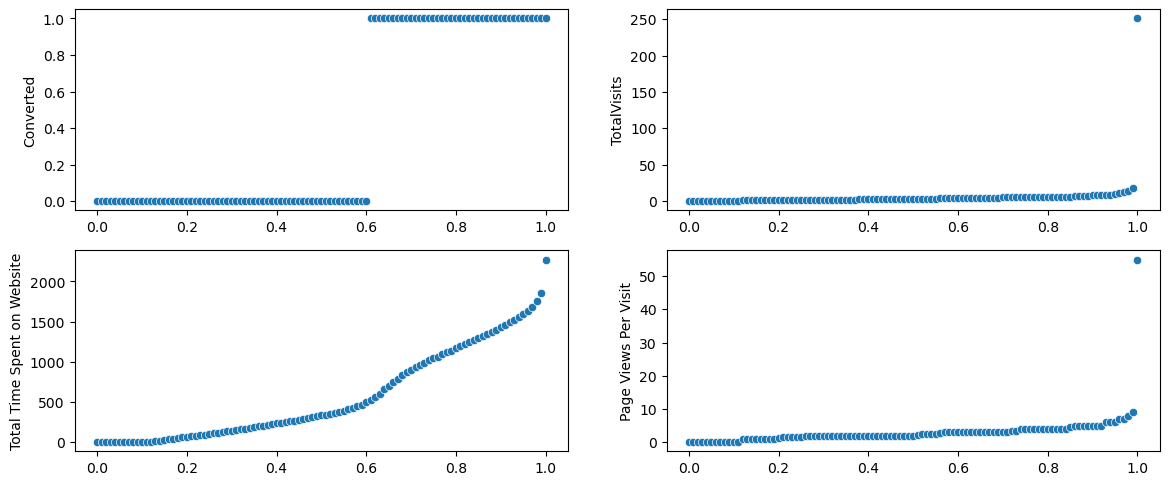

In [144]:
# Creating scatterplot of percentile, to check for outliers in all numerical columns.

i = 1
plt.figure(figsize=[14,12])
for col in num_var: 
    plt.subplot(4,2,i)
    sns.scatterplot(Lead_df[col].quantile( np.arange(0, 1.01, 0.01) ))
    i = i+1
plt.show()

**Insight,**
>- From Percentile scatterplot we can clearly see that, there are some outliers in **`TotalVisits`** and **`Page Views Per Visit`**.
>- Also, we can see **`Converted`** is having **`Binary Values`**, which is our target variable.

<a id="6"></a><h1 style='background:#e3e3e1; color:Black'><Left><br> [06. <u>Handling Outliers in Numeric Variables](#0) </br></Left></h1>

_Outliers are extreme values that deviate from the normal range of values in a dataset. Outliers can distort the results of data analysis, and should be identified and treated accordingly. Their are many techniques to handle outliers in the dataset.<br>
One of the common technique to treat outliers is by using **The Percentile Method.** <br>It involves calculating the threshold values based on percentiles and replacing any data points that exceed these thresholds with the corresponding threshold values._

### **6.1** : Creating new function to Calculate **IQR (Interquartile Range)** for easy calculation.

In [405]:
#Creating a function to calculate IQR (Inter Quartile range) along with IQR Upper and Lower limit, of any column

def IQR_Limits(column_name):
    IQR_Q1 = column_name.quantile(0.25)
    IQE_Q3 = column_name.quantile(0.75)
    IQR_value = IQE_Q3 - IQR_Q1

    IQR_lower_limit = IQR_Q1 - 1.5*IQR_value
    IQR_upper_limit = IQE_Q3 + 1.5*IQR_value

    return print(f"IQR Value is: {IQR_value} \nIQR Lower Limit is: {IQR_lower_limit} \nIQR Upper Limit is: {IQR_upper_limit}")


### **6.1** : Outlier Analysis of **`TotalVisits`** Column

In [174]:
# Checking Top 5% of data points (i.e. 95-100 percentile values) of 'TotalVisits'
Lead_df['TotalVisits'].quantile([0.95,0.96,0.97,0.98,0.99,1])

0.95    10.0
0.96    11.0
0.97    12.0
0.98    14.0
0.99    18.0
1.00    18.0
Name: TotalVisits, dtype: float64

In [160]:
# Capping 'TotalVisits' at 99th percentile Value (i.e. 1% of data points are considered outliers)
Lead_df.loc[Lead_df['TotalVisits'] > Lead_df['TotalVisits'].quantile(0.99) , ['TotalVisits'] ] = Lead_df['TotalVisits'].quantile(0.99)


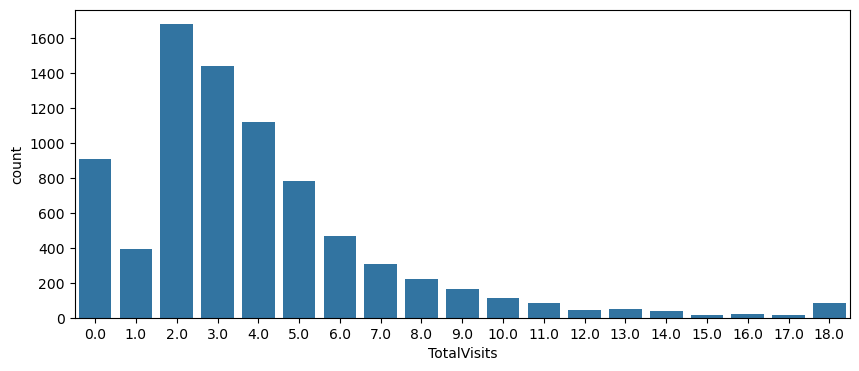

In [172]:
# Let's visualize the Countplot of 'TotalVisits'
plt.figure(figsize=[10,4])
sns.countplot(x=Lead_df['TotalVisits'])
plt.show()

### **6.2** : Outlier Analysis of **`Page Views Per Visit`** column

In [184]:
# Checking Top 5% of data points (i.e. 95-100 percentile values) of 'Page Views Per Visit' column
Lead_df['Page Views Per Visit'].quantile([0.95,0.96,0.97,0.98,0.99,1])


0.95     6.0
0.96     7.0
0.97     7.0
0.98     8.0
0.99     9.0
1.00    55.0
Name: Page Views Per Visit, dtype: float64

In [186]:
# Now, Capping 'Page Views Per Visit' at 99th percentile Value (i.e. 1% of data points are considered outliers)
Lead_df.loc[Lead_df['Page Views Per Visit'] > Lead_df['Page Views Per Visit'].quantile(0.99) , ['Page Views Per Visit'] ] = Lead_df['Page Views Per Visit'].quantile(0.99)


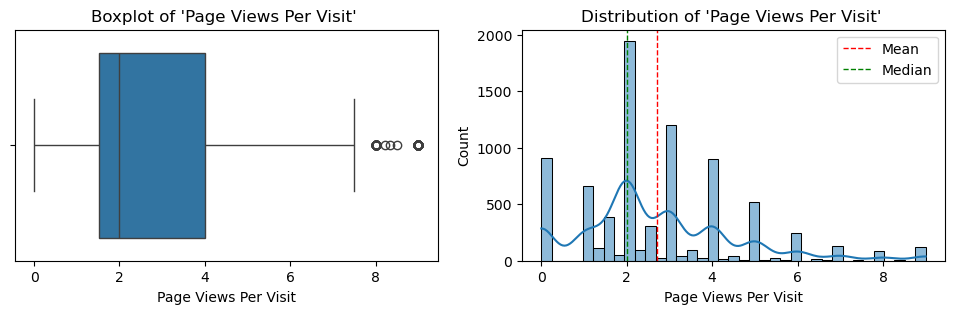

In [190]:
# Let's visualize the change in dustribution of 'Page Views Per Visit'
plot_box_histogram(Lead_df['Page Views Per Visit'])

### **6.3** : Outlier Analysis of **`Total Time Spent on Website`** column

In [193]:
# Checking Top 5% of data points (i.e. 95-100 percentile values) of 'Total Time Spent on Website'
Lead_df['Total Time Spent on Website'].quantile([0.95,0.96,0.97,0.98,0.99,1])

0.95    1591.10
0.96    1636.68
0.97    1686.26
0.98    1761.00
0.99    1851.42
1.00    2272.00
Name: Total Time Spent on Website, dtype: float64

In [195]:
# Capping 'Total Time Spent on Website' at 99th percentile Value (i.e. 1% of data points are considered outliers)
Lead_df.loc[Lead_df['Total Time Spent on Website'] > Lead_df['Total Time Spent on Website'].quantile(0.99) , ['Total Time Spent on Website'] ] = Lead_df['Total Time Spent on Website'].quantile(0.99)

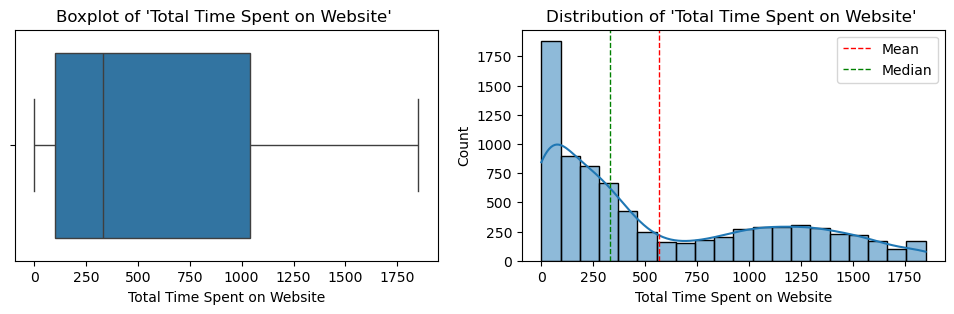

In [197]:
# Let's visualize the change in dustribution of 'Total Time Spent on Website'
plot_box_histogram(Lead_df['Total Time Spent on Website'])

### **6.4** : Let's check Descriptive Statistical Summary of our Dataset 

In [200]:
# Checking Descriptive Statistical Summary of our dataset
Lead_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,7959.000000,7959.000000,7959.000000,7959.00000
mean,0.399925,3.873853,564.933484,2.70391
std,0.489913,3.211787,548.373389,1.87031
min,0.000000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,102.000000,1.52000
50%,0.000000,3.000000,332.000000,2.00000
75%,1.000000,5.000000,1042.500000,4.00000
max,1.000000,18.000000,1851.420000,9.00000


<a id="7"></a><h1 style='background:#e3e3e1; color:Black'><Left><br> [07. <u>Analysis of Categorical Variables.](#0) </br></Left></h1>

### **7.1** : Now, let's update the Categorical Variables in **`cat_var`**

In [209]:
# Checking all the categorical variables in `cat_var`
cat_var = Lead_df.select_dtypes(exclude='number').columns
cat_var

Index(['Lead Origin', 'Do Not Email', 'Do Not Call',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Grouped_Specialization', 'Grouped_Activity', 'Grouped_Lead_Source'],
      dtype='object')

### **7.2** : Visualizing Countplot of all the Categorical Variables

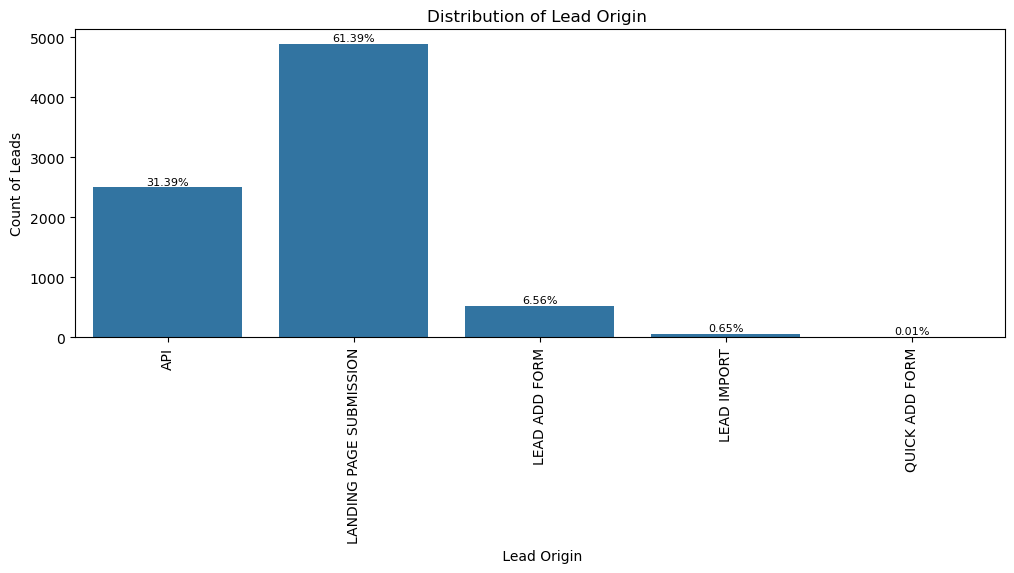

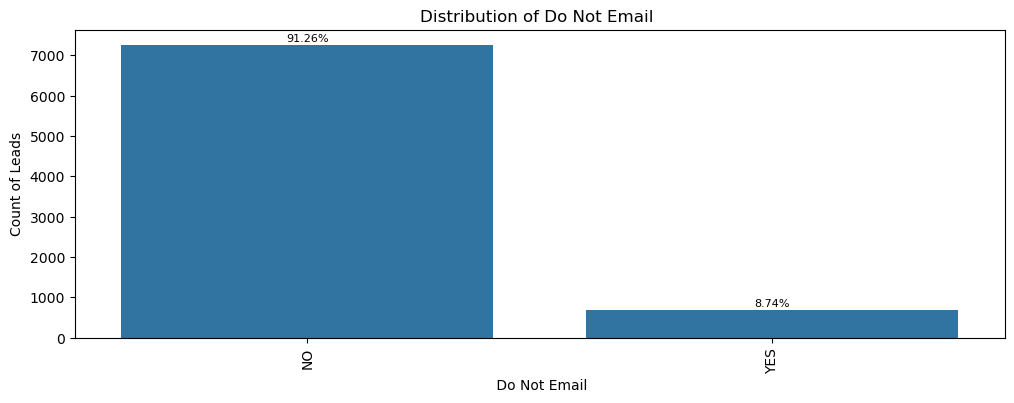

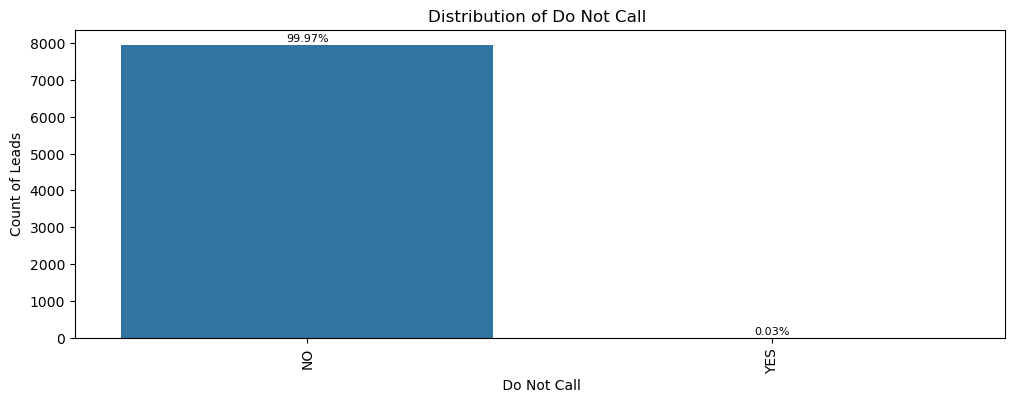

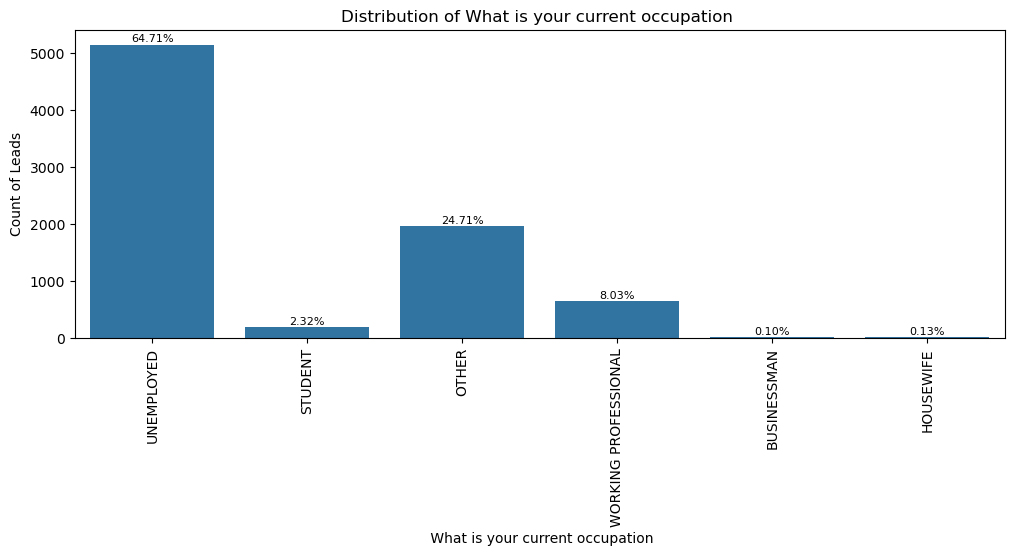

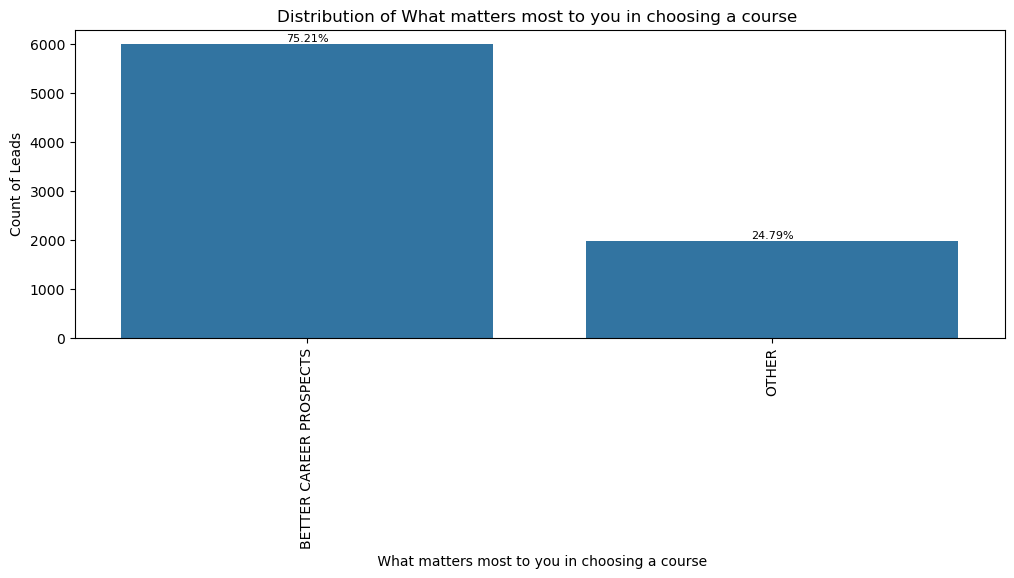

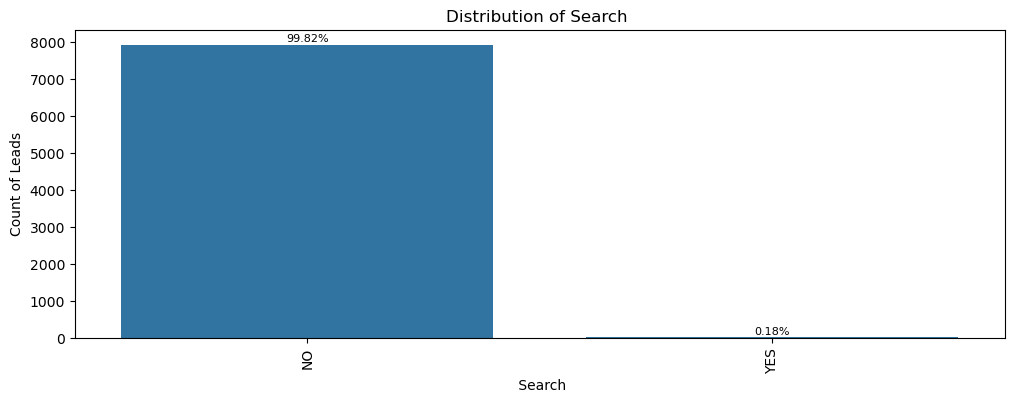

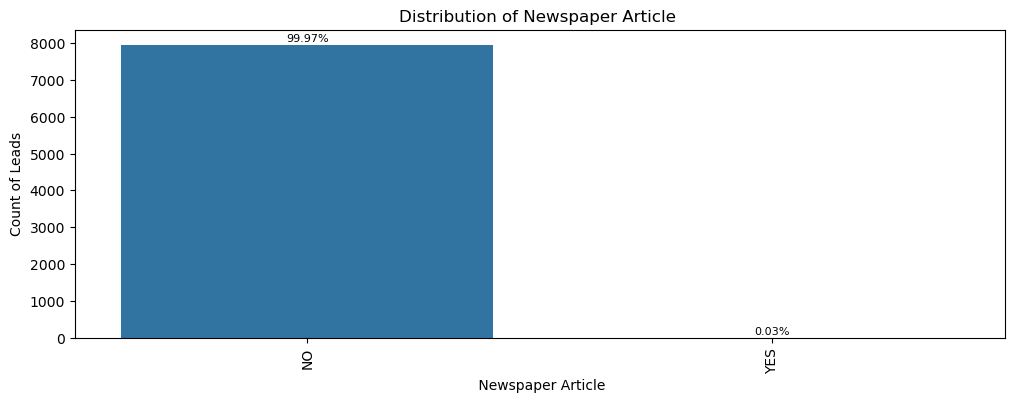

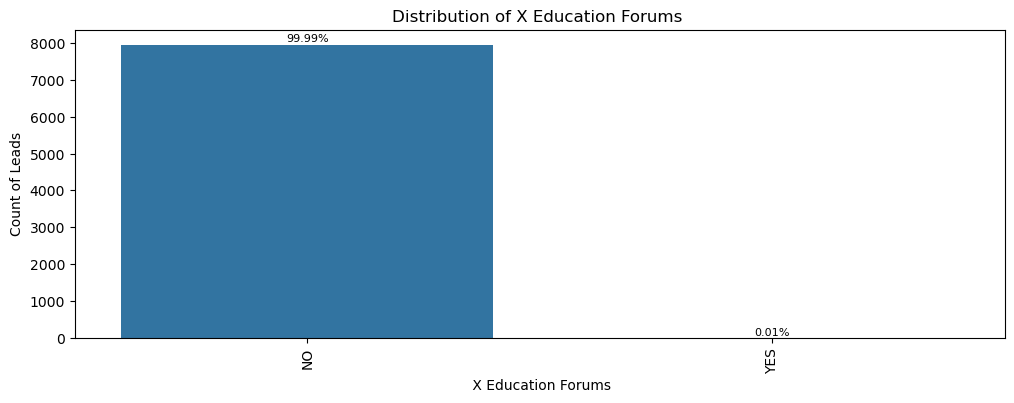

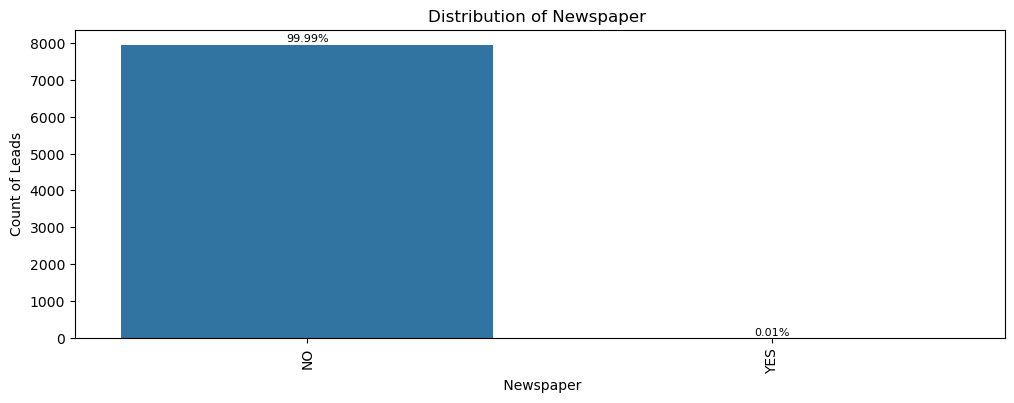

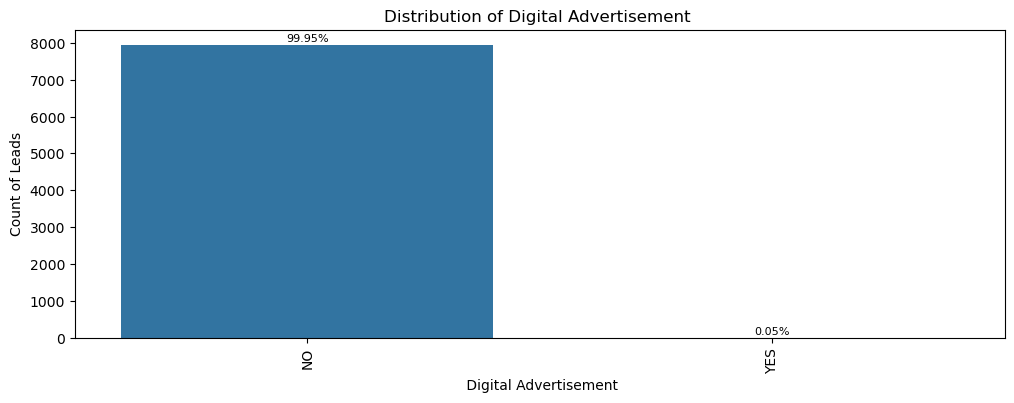

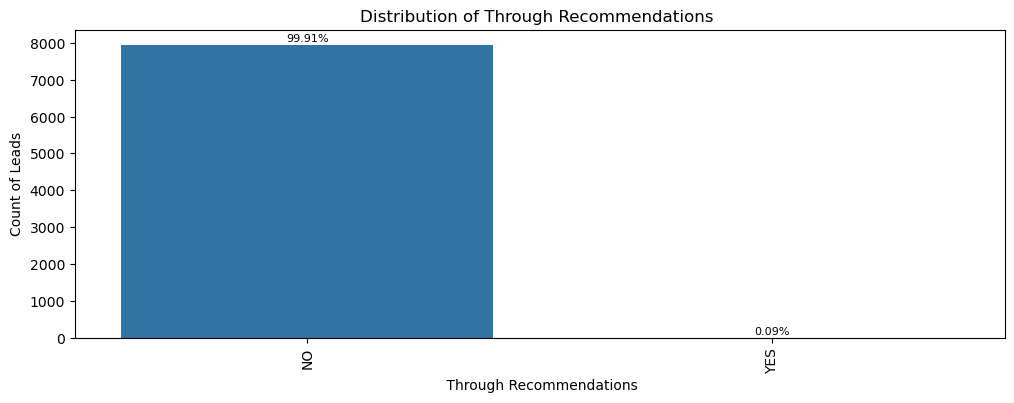

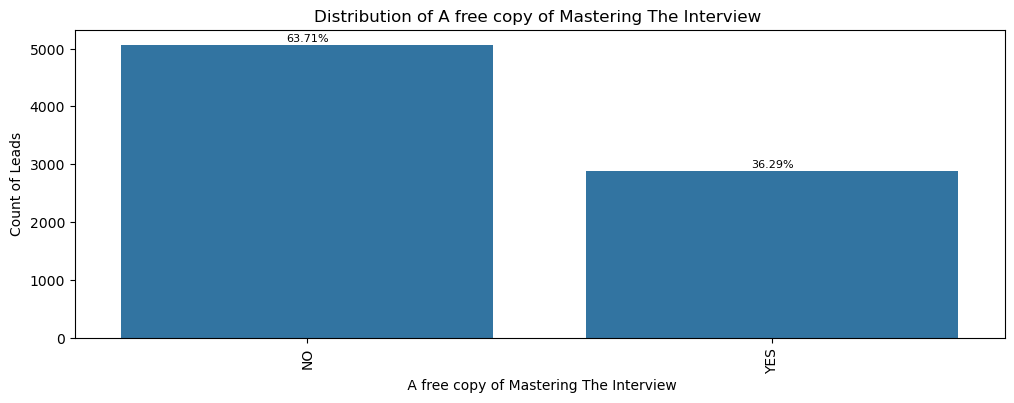

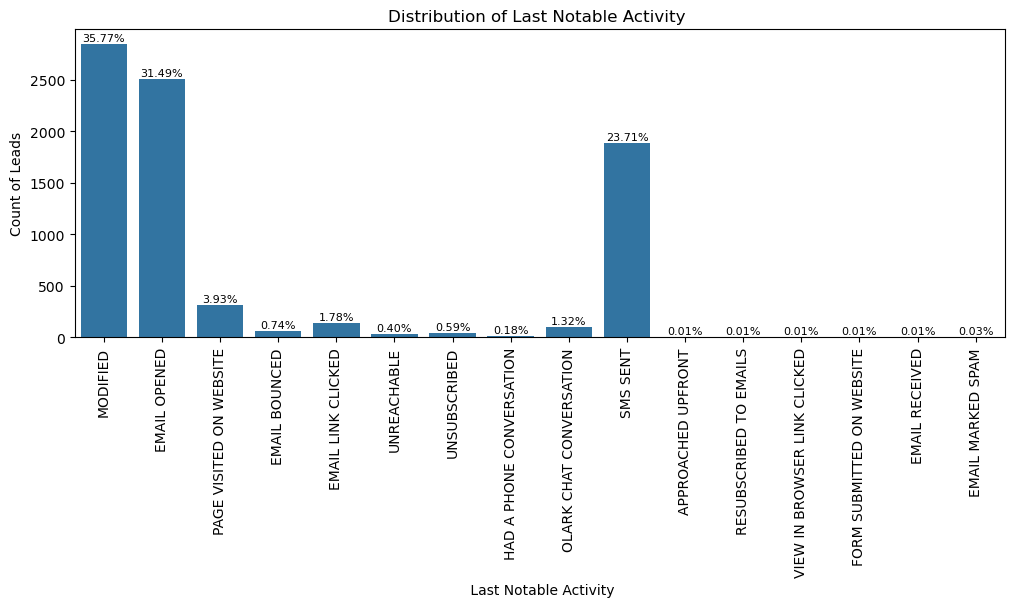

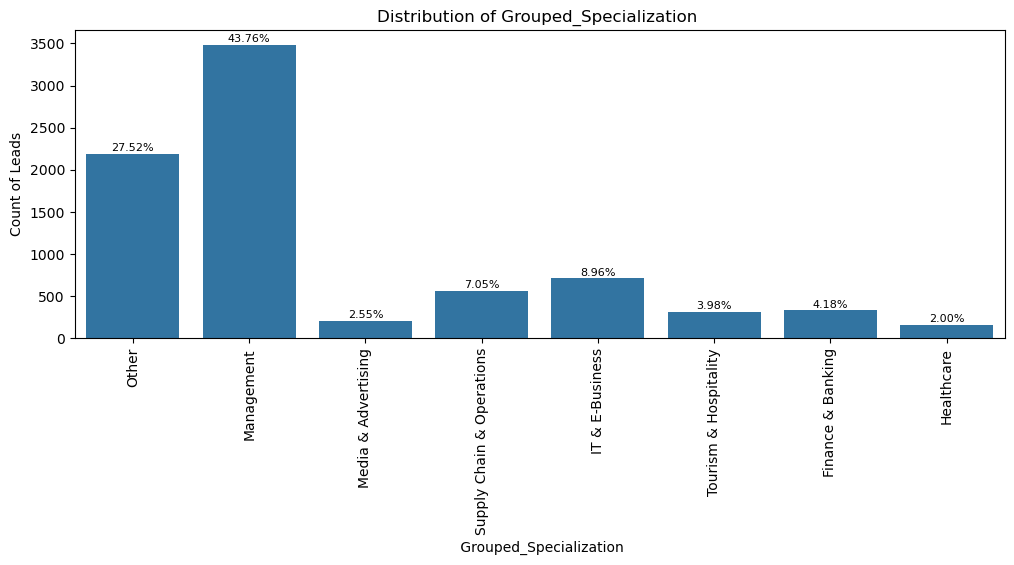

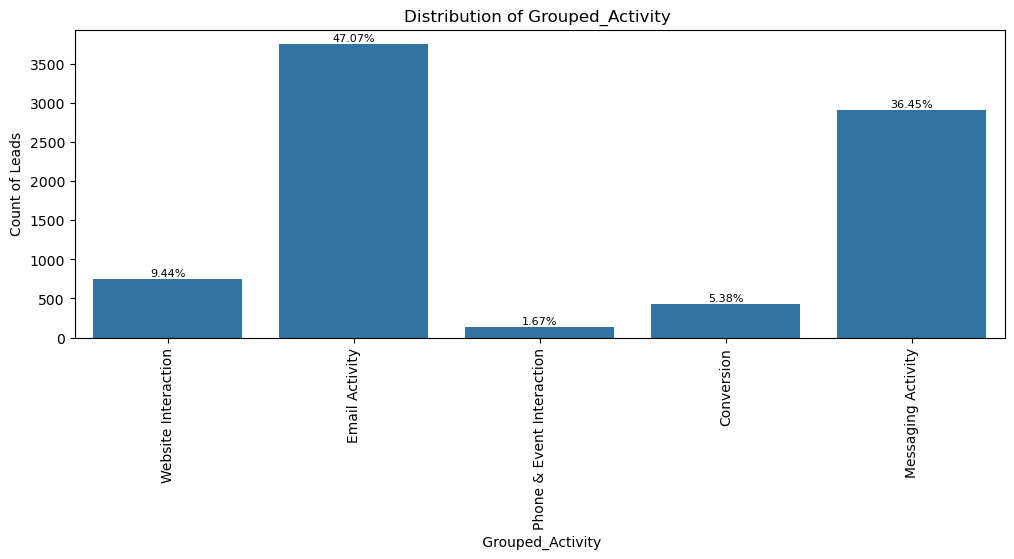

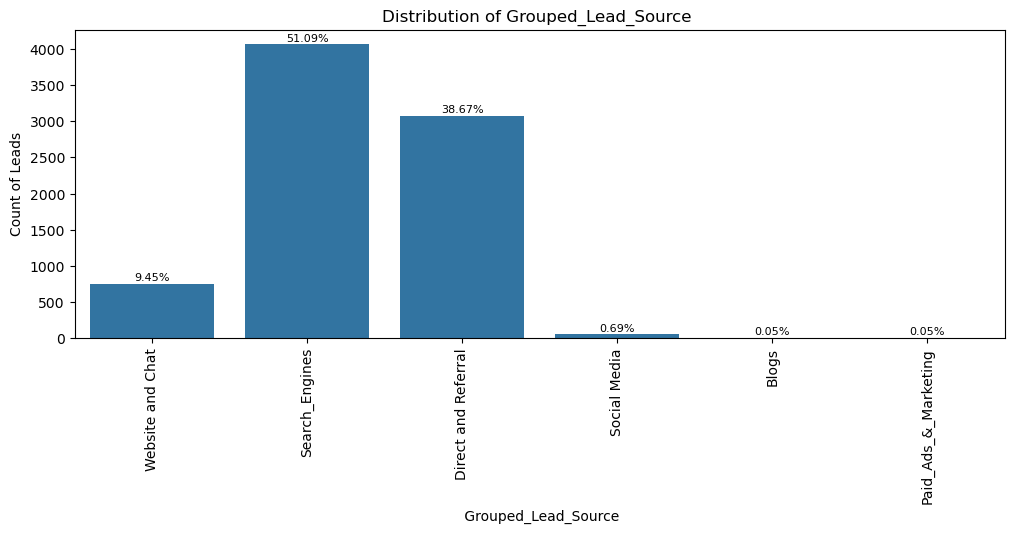

In [211]:
# Let's Visualize the Percentage of Lead Count for all the Categories
for col in cat_var:
    plt.figure(figsize=[12,4])
    ax = sns.countplot(x=Lead_df[col])
    plt.title(f"Distribution of {col} ")
    plt.xlabel(f" {col}")
    plt.ylabel(f"Count of Leads")
    plt.xticks(rotation=90)
    for p in ax.patches:
        count = p.get_height()
        percentage = f'{100 * count / len(Lead_df):.2f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., count), ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 2),
                    textcoords='offset points')
plt.show()

**Insight,**
> **From above countplot of all the Categorical Variables, we can see that :**
>- Some Columns are Highly Biased, i.e they are having more than 99% of only one type of Data. Thus we can Drop them as they can skew our analysis. These columns are **`Do Not Call`**, **`Search`**, **`Newspaper Article`**, **`X Education Forums`**, **`Newspaper`**, **`Digital Advertisement`** and **`Through Recommendations`**. 

### **7.3** : Dropping Highly Biased Variables

In [214]:
# Dropping Variables with Highly Biased Data.
Lead_df.drop(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'] , 
            axis=1 , inplace=True )
# Checking Shape Change
Lead_df.shape

(7959, 13)

### **7.4** : Droping **`Last Notable Activity`** column.
_As per the Data Dictionary, **`Last Notable Activity`** and **`Last Activity`** both are recording same data i.e. the last notable acitivity performed by the student.<br>
Thus, we can drop **`Last Notable Activity`** column._

In [216]:
# Dropping 'Last Notable Activity' column 
Lead_df.drop(['Last Notable Activity'], axis=1, inplace=True)


### **7.5** : Let's check Descriptive Stats of our Dataset

In [221]:
# Checking Descriptive Stats of our dataset
Lead_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Lead Origin,7959,5,LANDING PAGE SUBMISSION,4886,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Do Not Email,7959,2,NO,7263,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Converted,7959.0,NaN,NaN,NaN,0.399925,0.489913,0.0,0.0,0.0,1.0,1.0
TotalVisits,7959.0,NaN,NaN,NaN,3.873853,3.211787,0.0,2.0,3.0,5.0,18.0
Total Time Spent on Website,7959.0,NaN,NaN,NaN,564.933484,548.373389,0.0,102.0,332.0,1042.5,1851.42
Page Views Per Visit,7959.0,NaN,NaN,NaN,2.70391,1.87031,0.0,1.52,2.0,4.0,9.0
What is your current occupation,7959,6,UNEMPLOYED,5150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What matters most to you in choosing a course,7959,2,BETTER CAREER PROSPECTS,5986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A free copy of Mastering The Interview,7959,2,NO,5071,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grouped_Specialization,7959,8,Management,3483,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id="8"></a><h1 style='background:#e3e3e1; color:Black'><Left><br> [08. <u>Creating Dummy Variables of all Categorical Columns](#0) </br></Left></h1>

In [223]:
# Let's Update Variables in `num_var` and `cat_var`
num_var = Lead_df.select_dtypes(include='number').columns
print(num_var)

# Updating cat_var
cat_var = Lead_df.select_dtypes(exclude='number').columns
print(cat_var)

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')
Index(['Lead Origin', 'Do Not Email', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Grouped_Specialization',
       'Grouped_Activity', 'Grouped_Lead_Source'],
      dtype='object')


### **8.1** : Creating Dummy variables using **`Get_Dummies`** and dropping first dummy of each variable.

In [229]:
# Creating a dummy variable for the categorical variables and dropping the first one.
Lead_dummy = pd.get_dummies(Lead_df[cat_var], drop_first=True, dtype=int)
Lead_dummy.head()

,Lead Origin_LANDING PAGE SUBMISSION,Lead Origin_LEAD ADD FORM,Lead Origin_LEAD IMPORT,Lead Origin_QUICK ADD FORM,Do Not Email_YES,What is your current occupation_HOUSEWIFE,What is your current occupation_OTHER,What is your current occupation_STUDENT,What is your current occupation_UNEMPLOYED,What is your current occupation_WORKING PROFESSIONAL,...,Grouped_Specialization_Tourism & Hospitality,Grouped_Activity_Email Activity,Grouped_Activity_Messaging Activity,Grouped_Activity_Phone & Event Interaction,Grouped_Activity_Website Interaction,Grouped_Lead_Source_Direct and Referral,Grouped_Lead_Source_Paid_Ads_&_Marketing,Grouped_Lead_Source_Search_Engines,Grouped_Lead_Source_Social Media,Grouped_Lead_Source_Website and Chat
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


### **8.2** : Joining Dummy Dataframe with the Numeric Columns 

In [233]:
#  Concatenating Dummy variables with Numerical Variables into New Dataframe.
Lead_data = pd.concat([Lead_df[num_var], Lead_dummy] , axis=1)
Lead_data.head()


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_LANDING PAGE SUBMISSION,Lead Origin_LEAD ADD FORM,Lead Origin_LEAD IMPORT,Lead Origin_QUICK ADD FORM,Do Not Email_YES,What is your current occupation_HOUSEWIFE,...,Grouped_Specialization_Tourism & Hospitality,Grouped_Activity_Email Activity,Grouped_Activity_Messaging Activity,Grouped_Activity_Phone & Event Interaction,Grouped_Activity_Website Interaction,Grouped_Lead_Source_Direct and Referral,Grouped_Lead_Source_Paid_Ads_&_Marketing,Grouped_Lead_Source_Search_Engines,Grouped_Lead_Source_Social Media,Grouped_Lead_Source_Website and Chat
0,0,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,5.0,674.0,2.5,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,1,2.0,1532.0,2.0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,1.0,305.0,1.0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,1,2.0,1428.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


<a id="9"></a><h1 style='background:#e3e3e1; color:Black'><Left><br> [09. <u>Creating Correlation Matrix](#0) </br></Left></h1>

In [239]:
# Creating Correlation Matrix of all the variables of `Lead_data` Dataset
Lead_data.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_LANDING PAGE SUBMISSION,Lead Origin_LEAD ADD FORM,Lead Origin_LEAD IMPORT,Lead Origin_QUICK ADD FORM,Do Not Email_YES,What is your current occupation_HOUSEWIFE,...,Grouped_Specialization_Tourism & Hospitality,Grouped_Activity_Email Activity,Grouped_Activity_Messaging Activity,Grouped_Activity_Phone & Event Interaction,Grouped_Activity_Website Interaction,Grouped_Lead_Source_Direct and Referral,Grouped_Lead_Source_Paid_Ads_&_Marketing,Grouped_Lead_Source_Search_Engines,Grouped_Lead_Source_Social Media,Grouped_Lead_Source_Website and Chat
Converted,1.000000,0.015215,0.386203,-0.048493,-0.098002,0.279977,-0.024819,0.013731,-0.151029,0.043447,...,-0.008887,-0.078164,0.203471,0.017627,-0.106463,-0.002616,-0.006863,-0.008257,-0.024755,0.026530
TotalVisits,0.015215,1.000000,0.206512,0.630129,0.279911,-0.241024,-0.058971,-0.003050,-0.022740,-0.015173,...,0.070817,-0.020571,-0.043655,0.014582,0.213557,-0.058942,0.021827,0.239007,-0.056700,-0.295606
Total Time Spent on Website,0.386203,0.206512,1.000000,0.204352,0.147733,-0.124530,-0.045951,0.026300,-0.080613,0.002637,...,0.033930,-0.038504,0.067882,0.002064,-0.011915,-0.000385,0.004153,0.142515,-0.043897,-0.231016
Page Views Per Visit,-0.048493,0.630129,0.204352,1.000000,0.400116,-0.299258,-0.070549,-0.004219,-0.013033,-0.016195,...,0.092039,0.001896,0.011958,0.022495,0.061884,-0.068118,0.026781,0.308409,-0.066269,-0.396866
Lead Origin_LANDING PAGE SUBMISSION,-0.098002,0.279911,0.147733,0.400116,1.000000,-0.334066,-0.102257,-0.014135,0.072837,-0.008298,...,0.100817,0.012587,-0.053575,-0.001305,0.063531,0.302282,0.017783,-0.041870,-0.095839,-0.407312
Lead Origin_LEAD ADD FORM,0.279977,-0.241024,-0.124530,-0.299258,-0.334066,1.000000,-0.021485,-0.002970,-0.013741,0.047913,...,-0.020220,0.058278,-0.010825,0.028813,-0.045584,0.216901,-0.005941,-0.239281,-0.022100,0.054968
Lead Origin_LEAD IMPORT,-0.024819,-0.058971,-0.045951,-0.070549,-0.102257,-0.021485,1.000000,-0.000909,-0.019583,-0.002876,...,-0.008542,0.048509,-0.022532,-0.010572,-0.026176,-0.064398,-0.001818,-0.079758,0.953335,-0.026196
Lead Origin_QUICK ADD FORM,0.013731,-0.003050,0.026300,-0.004219,-0.014135,-0.002970,-0.000909,1.000000,0.036212,-0.000398,...,-0.002283,0.011888,-0.008490,-0.001461,-0.003618,-0.008902,-0.000251,0.010969,-0.000935,-0.003621
Do Not Email_YES,-0.151029,-0.022740,-0.080613,-0.013033,0.072837,-0.013741,-0.019583,0.036212,1.000000,-0.010980,...,0.050671,0.028888,-0.032980,-0.005658,0.062878,0.073825,0.032748,-0.069013,-0.015085,-0.002678
What is your current occupation_HOUSEWIFE,0.043447,-0.015173,0.002637,-0.016195,-0.008298,0.047913,-0.002876,-0.000398,-0.010980,1.000000,...,-0.007224,0.030509,-0.026861,-0.004624,0.000684,0.008249,-0.000795,-0.000771,-0.002959,-0.011457


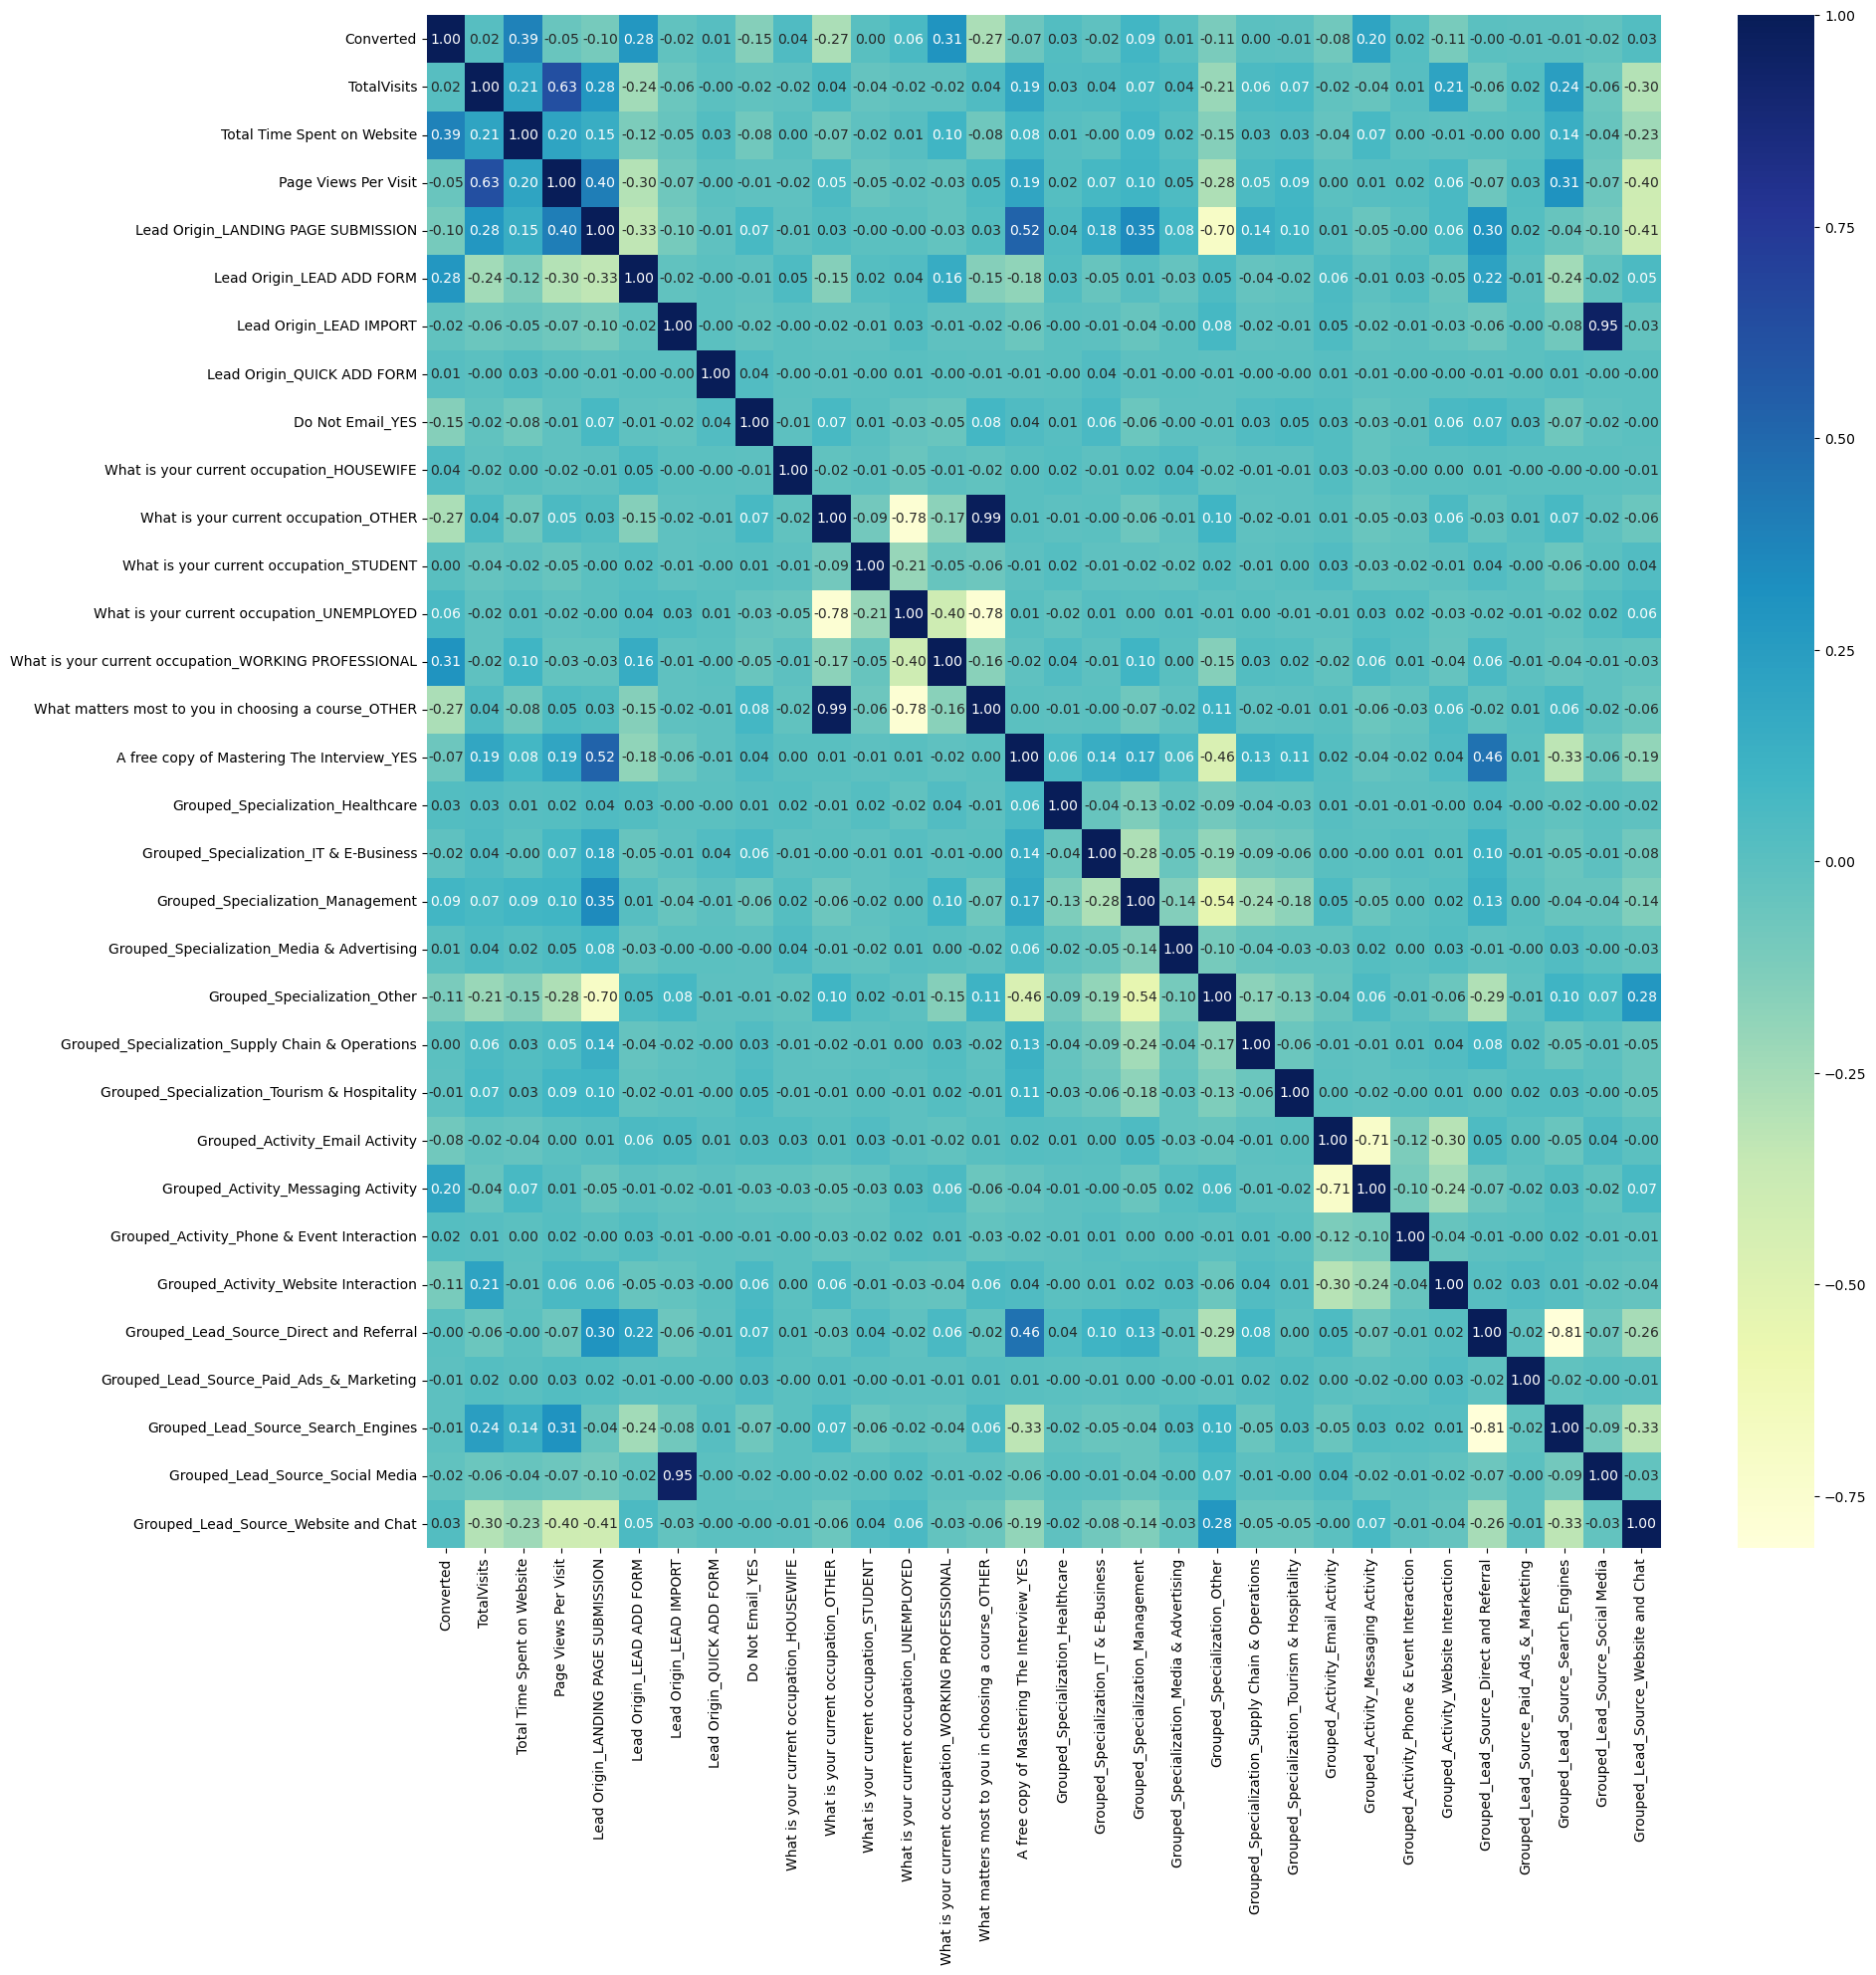

In [241]:
# Creating heatmap of Correlation Matrix for all variables of `Lead_data` Dataset
plt.figure(figsize=[20,20])
sns.heatmap(Lead_data.corr(), cmap="YlGnBu", annot = True, fmt=".2f" )
plt.show()

In [250]:
# Storing all the Features Names `col`
col = Lead_data.columns
col

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_LANDING PAGE SUBMISSION',
       'Lead Origin_LEAD ADD FORM', 'Lead Origin_LEAD IMPORT',
       'Lead Origin_QUICK ADD FORM', 'Do Not Email_YES',
       'What is your current occupation_HOUSEWIFE',
       'What is your current occupation_OTHER',
       'What is your current occupation_STUDENT',
       'What is your current occupation_UNEMPLOYED',
       'What is your current occupation_WORKING PROFESSIONAL',
       'What matters most to you in choosing a course_OTHER',
       'A free copy of Mastering The Interview_YES',
       'Grouped_Specialization_Healthcare',
       'Grouped_Specialization_IT & E-Business',
       'Grouped_Specialization_Management',
       'Grouped_Specialization_Media & Advertising',
       'Grouped_Specialization_Other',
       'Grouped_Specialization_Supply Chain & Operations',
       'Grouped_Specialization_Tourism & Hospitality',
       'Grouped_Acti

<a id="10"></a><h1 style='background:#e3e3e1; color:Black'><Left><br> [10. <u>Feature Scaling](#0) </br></Left></h1>

### **10.1** : Normalization of the Dataset using Min-Max Normalization

In [248]:
# Creating copy of our Dataset
Lead_data_scaled = pd.DataFrame(Lead_data)
Lead_data_scaled.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_LANDING PAGE SUBMISSION,Lead Origin_LEAD ADD FORM,Lead Origin_LEAD IMPORT,Lead Origin_QUICK ADD FORM,Do Not Email_YES,What is your current occupation_HOUSEWIFE,...,Grouped_Specialization_Tourism & Hospitality,Grouped_Activity_Email Activity,Grouped_Activity_Messaging Activity,Grouped_Activity_Phone & Event Interaction,Grouped_Activity_Website Interaction,Grouped_Lead_Source_Direct and Referral,Grouped_Lead_Source_Paid_Ads_&_Marketing,Grouped_Lead_Source_Search_Engines,Grouped_Lead_Source_Social Media,Grouped_Lead_Source_Website and Chat
0,0,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,5.0,674.0,2.5,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,1,2.0,1532.0,2.0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,1.0,305.0,1.0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,1,2.0,1428.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [254]:
# Importing required Min-maxScaler libriary
from sklearn.preprocessing import MinMaxScaler

my_scaler = MinMaxScaler()
Lead_data_scaled[col] = my_scaler.fit_transform(Lead_data[col])

# Checking Descripetive Stats of Scaled Dataset
Lead_data_scaled.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_LANDING PAGE SUBMISSION,Lead Origin_LEAD ADD FORM,Lead Origin_LEAD IMPORT,Lead Origin_QUICK ADD FORM,Do Not Email_YES,What is your current occupation_HOUSEWIFE,...,Grouped_Specialization_Tourism & Hospitality,Grouped_Activity_Email Activity,Grouped_Activity_Messaging Activity,Grouped_Activity_Phone & Event Interaction,Grouped_Activity_Website Interaction,Grouped_Lead_Source_Direct and Referral,Grouped_Lead_Source_Paid_Ads_&_Marketing,Grouped_Lead_Source_Search_Engines,Grouped_Lead_Source_Social Media,Grouped_Lead_Source_Website and Chat
count,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000,...,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000
mean,0.399925,0.215214,0.305135,0.300434,0.613896,0.065586,0.006533,0.000126,0.087448,0.001256,...,0.039829,0.470662,0.364493,0.016711,0.094359,0.386732,0.000503,0.510868,0.006910,0.094484
std,0.489913,0.178433,0.296191,0.207812,0.486885,0.247573,0.080571,0.011209,0.282508,0.035426,...,0.195570,0.499170,0.481318,0.128193,0.292345,0.487032,0.022414,0.499913,0.082846,0.292520
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.111111,0.055093,0.168889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.166667,0.179322,0.222222,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.277778,0.563081,0.444444,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [261]:
Lead_data_scaled.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_LANDING PAGE SUBMISSION',
       'Lead Origin_LEAD ADD FORM', 'Lead Origin_LEAD IMPORT',
       'Lead Origin_QUICK ADD FORM', 'Do Not Email_YES',
       'What is your current occupation_HOUSEWIFE',
       'What is your current occupation_OTHER',
       'What is your current occupation_STUDENT',
       'What is your current occupation_UNEMPLOYED',
       'What is your current occupation_WORKING PROFESSIONAL',
       'What matters most to you in choosing a course_OTHER',
       'A free copy of Mastering The Interview_YES',
       'Grouped_Specialization_Healthcare',
       'Grouped_Specialization_IT & E-Business',
       'Grouped_Specialization_Management',
       'Grouped_Specialization_Media & Advertising',
       'Grouped_Specialization_Other',
       'Grouped_Specialization_Supply Chain & Operations',
       'Grouped_Specialization_Tourism & Hospitality',
       'Grouped_Acti

<a id="11"></a><h1 style='background:#e3e3e1; color:Black'><Left><br> [11. <u>Model Building using Logistic Regression](#0) </br></Left></h1>

### **11.1** : Splitting Data into Training set and Test set.
_As you know, the first basic step for regression is performing a train-test split._

In [257]:
# Putting feature variable to X
X = Lead_data_scaled.drop(['Converted'], axis=1)

# Putting Target variable to y
y = Lead_data_scaled['Converted']

In [269]:
# Checking the Lead Conversion rate
(sum(Lead_data_scaled['Converted'])/len(Lead_data_scaled['Converted']))*100

39.992461364493025

In [259]:
# Importing required library
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
X_train.shape , X_test.shape

((5969, 31), (1990, 31))

### **11.2** : Running First Model **`logm1`**

In [293]:
# Importing required Libraries
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=50)
logm1 = logreg.fit(X_train, y_train)

In [295]:
# Checking `Score` i.e. the mean accuracy of the given test data 
logm1.score(X_test, y_test)

0.7979899497487437

In [279]:
from sklearn import metrics
print ('Accuracy: ', metrics.accuracy_score(y_test, y_pred_ada))
print ('F1 score: ', metrics.f1_score(y_test, y_pred_ada))
print ('Recall: ', metrics.recall_score(y_test, y_pred_ada))
print ('Precision: ', metrics.precision_score(y_test, y_pred_ada))
print ('\n clasification report:\n', metrics.classification_report(y_test, y_pred_ada))
print ('\n confussion matrix:\n', metrics.confusion_matrix(y_test, y_pred_ada))

NameError: name 'y_pred_ada' is not defined

### **11.3** : Feature Selection Using RFE

In [325]:
# Importing required Libraries
from sklearn.feature_selection import RFE

logreg1 = LogisticRegression(random_state=50)
rfe = RFE(logreg1, n_features_to_select= 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [327]:
rfe.score(X_test,y_test)

0.7964824120603015

In [329]:
rfe.support_

array([ True,  True,  True,  True,  True, False, False,  True,  True,
       False, False,  True,  True,  True, False, False, False, False,
       False,  True, False, False,  True,  True,  True, False, False,
       False, False, False,  True])

In [331]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_LANDING PAGE SUBMISSION', True, 1),
 ('Lead Origin_LEAD ADD FORM', True, 1),
 ('Lead Origin_LEAD IMPORT', False, 12),
 ('Lead Origin_QUICK ADD FORM', False, 17),
 ('Do Not Email_YES', True, 1),
 ('What is your current occupation_HOUSEWIFE', True, 1),
 ('What is your current occupation_OTHER', False, 3),
 ('What is your current occupation_STUDENT', False, 2),
 ('What is your current occupation_UNEMPLOYED', True, 1),
 ('What is your current occupation_WORKING PROFESSIONAL', True, 1),
 ('What matters most to you in choosing a course_OTHER', True, 1),
 ('A free copy of Mastering The Interview_YES', False, 8),
 ('Grouped_Specialization_Healthcare', False, 16),
 ('Grouped_Specialization_IT & E-Business', False, 13),
 ('Grouped_Specialization_Management', False, 14),
 ('Grouped_Specialization_Media & Advertising', False, 9),
 ('Grouped_Specialization_Other', True, 1),
 ('Gr

In [333]:
# Updating Features in `col` variable 
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_LANDING PAGE SUBMISSION', 'Lead Origin_LEAD ADD FORM',
       'Do Not Email_YES', 'What is your current occupation_HOUSEWIFE',
       'What is your current occupation_UNEMPLOYED',
       'What is your current occupation_WORKING PROFESSIONAL',
       'What matters most to you in choosing a course_OTHER',
       'Grouped_Specialization_Other', 'Grouped_Activity_Email Activity',
       'Grouped_Activity_Messaging Activity',
       'Grouped_Activity_Phone & Event Interaction',
       'Grouped_Lead_Source_Website and Chat'],
      dtype='object')

In [335]:
# Lets check Features that are not selected
X_train.columns[~rfe.support_]

Index(['Lead Origin_LEAD IMPORT', 'Lead Origin_QUICK ADD FORM',
       'What is your current occupation_OTHER',
       'What is your current occupation_STUDENT',
       'A free copy of Mastering The Interview_YES',
       'Grouped_Specialization_Healthcare',
       'Grouped_Specialization_IT & E-Business',
       'Grouped_Specialization_Management',
       'Grouped_Specialization_Media & Advertising',
       'Grouped_Specialization_Supply Chain & Operations',
       'Grouped_Specialization_Tourism & Hospitality',
       'Grouped_Activity_Website Interaction',
       'Grouped_Lead_Source_Direct and Referral',
       'Grouped_Lead_Source_Paid_Ads_&_Marketing',
       'Grouped_Lead_Source_Search_Engines',
       'Grouped_Lead_Source_Social Media'],
      dtype='object')

### **11.4** : Assessing the model with StatsModels

In [337]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5969
Model:                            GLM   Df Residuals:                     5953
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.0
Date:                Tue, 17 Sep 2024   Deviance:                       5188.0
Time:                        03:04:01   Pearson chi2:                 6.90e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3780
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6941      0.264     -6.408      0.000      -2.212      -1.176
TotalVisits                                              1.2652      0.248      5.102      0.000       0.779       1.751
Total Time Spent on Website                              3.5325      0.128     27.501      0.000       3.281       3.784
Page Views Per Visit                                    -0.7806      0.234     -3.332      0.001      -1.240      -0.321
Lead Origin_LANDING PAGE SUBMISSION                     -0.7508      0.123     -6.079      0.000      -0.993      -0.509
Lead Origin_LEAD ADD FORM                                3.2682      0.215     15.185      0.000       2.846       3.690
Do Not Email_YES                                        -1.2205      0.158     -7.714      0.000      -1.531      -0.910
What is your current occupation_HOUSEWIFE               22.2090   1.42e+04      0.002      0.999   -2.78e+04    2.79e+04
What is your current occupation_UNEMPLOYED              -0.2501      0.212     -1.180      0.238      -0.665       0.165
What is your current occupation_WORKING PROFESSIONAL     2.1975      0.277      7.939      0.000       1.655       2.740
What matters most to you in choosing a course_OTHER     -1.4524      0.225     -6.468      0.000      -1.893      -1.012
Grouped_Specialization_Other                            -0.9890      0.123     -8.064      0.000      -1.229      -0.749
Grouped_Activity_Email Activity                          0.7464      0.118      6.308      0.000       0.515       0.978
Grouped_Activity_Messaging Activity                      1.6120      0.121     13.338      0.000       1.375       1.849
Grouped_Activity_Phone & Event Interaction               1.0770      0.285      3.779      0.000       0.518       1.636
Grouped_Lead_Source_Website and Chat                     0.7306      0.142      5.151      0.000       0.453       1.009
========================================================================================================================
"""

In [339]:
# Importing required library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,What is your current occupation_UNEMPLOYED,9.68
3,Lead Origin_LANDING PAGE SUBMISSION,6.44
2,Page Views Per Visit,6.09
9,What matters most to you in choosing a course_...,4.39
0,TotalVisits,4.10
11,Grouped_Activity_Email Activity,3.87
12,Grouped_Activity_Messaging Activity,3.38
10,Grouped_Specialization_Other,2.93
1,Total Time Spent on Website,2.30
8,What is your current occupation_WORKING PROFES...,1.97


### Dropping the column  'What is your current occupation_Unemployed' because it has high VIF

In [341]:
col = col.drop('What is your current occupation_UNEMPLOYED')

### **11.4** : Again assessing the model with StatsModels

In [344]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5969
Model:                            GLM   Df Residuals:                     5954
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.7
Date:                Thu, 12 Sep 2024   Deviance:                       5187.4
Time:                        20:48:45   Pearson chi2:                 6.92e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3781
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9713      0.172    -11.449      0.000      -2.309      -1.634
TotalVisits                                              1.0719      0.183      5.854      0.000       0.713       1.431
Total Time Spent on Website                              4.2956      0.157     27.327      0.000       3.988       4.604
Page Views Per Visit                                    -0.9428      0.224     -4.206      0.000      -1.382      -0.503
Lead Origin_LANDING PAGE SUBMISSION                     -0.7439      0.124     -6.021      0.000      -0.986      -0.502
Lead Origin_LEAD ADD FORM                                3.3033      0.216     15.275      0.000       2.879       3.727
Do Not Email_YES                                        -1.2067      0.158     -7.621      0.000      -1.517      -0.896
What is your current occupation_HOUSEWIFE               22.4452   1.42e+04      0.002      0.999   -2.78e+04    2.78e+04
What is your current occupation_WORKING PROFESSIONAL     2.4382      0.188     12.983      0.000       2.070       2.806
What matters most to you in choosing a course_OTHER     -1.2202      0.093    -13.168      0.000      -1.402      -1.039
Grouped_Specialization_Other                            -0.9781      0.123     -7.968      0.000      -1.219      -0.738
Grouped_Activity_Email Activity                          0.7276      0.118      6.179      0.000       0.497       0.958
Grouped_Activity_Messaging Activity                      1.5955      0.120     13.277      0.000       1.360       1.831
Grouped_Activity_Phone & Event Interaction               1.0739      0.285      3.772      0.000       0.516       1.632
Grouped_Lead_Source_Website and Chat                     0.7687      0.144      5.354      0.000       0.487       1.050
========================================================================================================================
"""

In [346]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,7.36
0,TotalVisits,6.17
3,Lead Origin_LANDING PAGE SUBMISSION,4.45
10,Grouped_Activity_Email Activity,3.30
11,Grouped_Activity_Messaging Activity,2.92
1,Total Time Spent on Website,2.23
9,Grouped_Specialization_Other,2.13
8,What matters most to you in choosing a course_...,1.42
13,Grouped_Lead_Source_Website and Chat,1.39
4,Lead Origin_LEAD ADD FORM,1.24


### Dropping the column 'Page Views Per Visit' because it has high VIF

In [348]:
# Page Views Per Visit
col = col.drop('Page Views Per Visit')

In [350]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5969
Model:                            GLM   Df Residuals:                     5955
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2602.6
Date:                Thu, 12 Sep 2024   Deviance:                       5205.2
Time:                        20:48:52   Pearson chi2:                 6.95e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3762
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0511      0.171    -11.993      0.000      -2.386      -1.716
TotalVisits                                              0.6096      0.147      4.143      0.000       0.321       0.898
Total Time Spent on Website                              4.2859      0.157     27.318      0.000       3.978       4.593
Lead Origin_LANDING PAGE SUBMISSION                     -0.7937      0.123     -6.457      0.000      -1.035      -0.553
Lead Origin_LEAD ADD FORM                                3.4092      0.216     15.807      0.000       2.986       3.832
Do Not Email_YES                                        -1.2097      0.158     -7.649      0.000      -1.520      -0.900
What is your current occupation_HOUSEWIFE               22.5313   1.41e+04      0.002      0.999   -2.77e+04    2.77e+04
What is your current occupation_WORKING PROFESSIONAL     2.4322      0.187     12.976      0.000       2.065       2.800
What matters most to you in choosing a course_OTHER     -1.2091      0.092    -13.091      0.000      -1.390      -1.028
Grouped_Specialization_Other                            -0.9664      0.123     -7.884      0.000      -1.207      -0.726
Grouped_Activity_Email Activity                          0.6687      0.116      5.741      0.000       0.440       0.897
Grouped_Activity_Messaging Activity                      1.5180      0.118     12.852      0.000       1.286       1.749
Grouped_Activity_Phone & Event Interaction               0.9881      0.283      3.487      0.000       0.433       1.544
Grouped_Lead_Source_Website and Chat                     0.8957      0.141      6.358      0.000       0.620       1.172
========================================================================================================================
"""

In [352]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_LANDING PAGE SUBMISSION,4.20
0,TotalVisits,3.46
9,Grouped_Activity_Email Activity,3.18
10,Grouped_Activity_Messaging Activity,2.79
1,Total Time Spent on Website,2.23
8,Grouped_Specialization_Other,2.12
7,What matters most to you in choosing a course_...,1.42
12,Grouped_Lead_Source_Website and Chat,1.35
3,Lead Origin_LEAD ADD FORM,1.23
6,What is your current occupation_WORKING PROFES...,1.17


In [354]:
# 'What is your current occupation_HOUSEWIFE'
col = col.drop('What is your current occupation_HOUSEWIFE')

In [356]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5969
Model:                            GLM   Df Residuals:                     5956
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.4
Date:                Thu, 12 Sep 2024   Deviance:                       5214.8
Time:                        20:48:57   Pearson chi2:                 6.96e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3752
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0455      0.171    -11.967      0.000      -2.381      -1.711
TotalVisits                                              0.6010      0.147      4.087      0.000       0.313       0.889
Total Time Spent on Website                              4.2840      0.157     27.330      0.000       3.977       4.591
Lead Origin_LANDING PAGE SUBMISSION                     -0.7927      0.123     -6.457      0.000      -1.033      -0.552
Lead Origin_LEAD ADD FORM                                3.4130      0.216     15.835      0.000       2.991       3.835
Do Not Email_YES                                        -1.2138      0.158     -7.676      0.000      -1.524      -0.904
What is your current occupation_WORKING PROFESSIONAL     2.4268      0.187     12.949      0.000       2.059       2.794
What matters most to you in choosing a course_OTHER     -1.2123      0.092    -13.130      0.000      -1.393      -1.031
Grouped_Specialization_Other                            -0.9704      0.122     -7.923      0.000      -1.211      -0.730
Grouped_Activity_Email Activity                          0.6761      0.116      5.807      0.000       0.448       0.904
Grouped_Activity_Messaging Activity                      1.5185      0.118     12.857      0.000       1.287       1.750
Grouped_Activity_Phone & Event Interaction               0.9880      0.283      3.486      0.000       0.432       1.543
Grouped_Lead_Source_Website and Chat                     0.8907      0.141      6.324      0.000       0.615       1.167
========================================================================================================================
"""

In [358]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_LANDING PAGE SUBMISSION,4.20
0,TotalVisits,3.46
8,Grouped_Activity_Email Activity,3.17
9,Grouped_Activity_Messaging Activity,2.79
1,Total Time Spent on Website,2.23
7,Grouped_Specialization_Other,2.12
6,What matters most to you in choosing a course_...,1.42
11,Grouped_Lead_Source_Website and Chat,1.35
3,Lead Origin_LEAD ADD FORM,1.23
5,What is your current occupation_WORKING PROFES...,1.17


**Since the Pvalues of all variables is 0 and VIF values are low for all the variables,<br>
This model is our final model. We have 12 variables in our final model.**

In [366]:
# Feature Importances
importances = res.feature_importances_
feature_names = X_test.columns
for feature, importance in zip(feature_names, importances):
    print(f"Feature: {feature}, Importance: {importance:.4f}")

AttributeError: 'GLMResults' object has no attribute 'feature_importances_'

### Making Prediction on the Train set

In [360]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred

4248    0.020494
1034    0.054011
8493    0.645684
475     0.885300
1381    0.583465
          ...   
8683    0.066870
7246    0.425408
2121    0.863000
6470    0.604711
6712    0.997886
Length: 5969, dtype: float64

In [362]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.02049358, 0.05401094, 0.64568429, ..., 0.86299958, 0.60471051,
       0.99788645])

### **11.5** : Creating a dataframe with the Target variable Values and the predicted probabilities

In [394]:
y_train_pred_final = pd.DataFrame({'Conv':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['Indexed'] = y_train.index
y_train_pred_final.head()

,Conv,Conv_Prob,Indexed
0,0.0,0.020494,4248
1,0.0,0.054011,1034
2,0.0,0.645684,8493
3,1.0,0.885300,475
4,1.0,0.583465,1381


### **11.5.1** : Creating new column 'Predicted' with 1 if Conv_Prob > 0.5 else 0

In [576]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Conv,Conv_Prob,Indexed,Predicted
0,0.0,0.020494,4248,0
1,0.0,0.054011,1034,0
2,0.0,0.645684,8493,1
3,1.0,0.885300,475,1
4,1.0,0.583465,1381,1


### **11.6** Evaluating the Results

In [578]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final['Conv'] , y_train_pred_final['Predicted'] )
print(confusion)

[[3162  434]
 [ 742 1631]]


In [580]:
# Checking Accuracy Score
print(metrics.accuracy_score(y_train_pred_final['Conv'], y_train_pred_final['Predicted']))

0.8029820740492545


In [582]:
# Checking Recall Score or 'sensitivity' or 'True Positive Rate' 
metrics.recall_score(y_train_pred_final['Conv'], y_train_pred_final['Predicted'])

0.6873156342182891

### Making Prediction on the Test set

In [602]:
# Getting the predicted values on the train set
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)
y_test_pred


1040    0.043313
3601    0.830965
7149    0.024397
8969    0.189308
8624    0.239243
          ...   
3602    0.907935
8935    0.088063
6526    0.690153
6692    0.484656
6116    0.045963
Length: 1990, dtype: float64

In [604]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred

array([0.04331307, 0.83096529, 0.0243966 , ..., 0.69015345, 0.48465602,
       0.04596342])

In [606]:
y_test_pred_final = pd.DataFrame({'Conv':y_test.values, 'Conv_Prob':y_test_pred})
y_test_pred_final['Indexed'] = y_test.index
y_test_pred_final.head()

,Conv,Conv_Prob,Indexed
0,0.0,0.043313,1040
1,0.0,0.830965,3601
2,0.0,0.024397,7149
3,0.0,0.189308,8969
4,1.0,0.239243,8624


In [608]:
y_test_pred_final['Predicted'] = y_test_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_test_pred_final.head()

,Conv,Conv_Prob,Indexed,Predicted
0,0.0,0.043313,1040,0
1,0.0,0.830965,3601,1
2,0.0,0.024397,7149,0
3,0.0,0.189308,8969,0
4,1.0,0.239243,8624,0


In [610]:
# Checking Accuracy Score
print(metrics.accuracy_score(y_test_pred_final['Conv'], y_test_pred_final['Predicted']))

# Checking Recall Score or 'sensitivity' or 'True Positive Rate' 
metrics.recall_score(y_test_pred_final['Conv'], y_test_pred_final['Predicted'])


0.7949748743718593


0.6790123456790124

In [397]:
print ('Accuracy: ', metrics.accuracy_score(y_test_pred_final['Conv'], y_test_pred_final['Predicted']))
print ('F1 score: ', metrics.f1_score(y_test_pred_final['Conv'], y_test_pred_final['Predicted']))
print ('Recall: ', metrics.recall_score(y_test_pred_final['Conv'], y_test_pred_final['Predicted']))
print ('Precision: ', metrics.precision_score(y_test_pred_final['Conv'], y_test_pred_final['Predicted']))
print ('\n clasification report:\n', metrics.classification_report(y_test_pred_final['Conv'], y_test_pred_final['Predicted']))
print ('\n confussion matrix:\n', metrics.confusion_matrix(y_test_pred_final['Conv'], y_test_pred_final['Predicted']))

NameError: name 'metrics' is not defined

### **11.7** : Checking VIF's of the Model's Feature Variables

In [402]:
# Importing required library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [423]:
# Importing required library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,What is your current occupation_UNEMPLOYED,9.81
2,Page Views Per Visit,7.45
3,Lead Origin_LANDING PAGE SUBMISSION,6.45
0,TotalVisits,6.32
9,What matters most to you in choosing a course_...,4.45
11,Grouped_Activity_Email Activity,3.85
12,Grouped_Activity_Messaging Activity,3.36
10,Grouped_Specialization_Other,2.93
1,Total Time Spent on Website,2.30
8,What is your current occupation_WORKING PROFES...,1.98


### **11.8** : Checking Metrics beyond simply Accuracy

In [407]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [409]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6923725242309313

In [411]:
# Let us calculate specificity
TN / float(TN+FP)

0.8798665183537263

In [413]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.12013348164627363


In [415]:
# positive predictive value 
print (TP / float(TP+FP))

0.7918072289156627


In [417]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8125321006676939


### **11.9** : Plotting the ROC Curve

>An ROC curve demonstrates several things:
>- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
>- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
>- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [421]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [423]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Conv'], y_train_pred_final['Conv_Prob'], drop_intermediate = False )

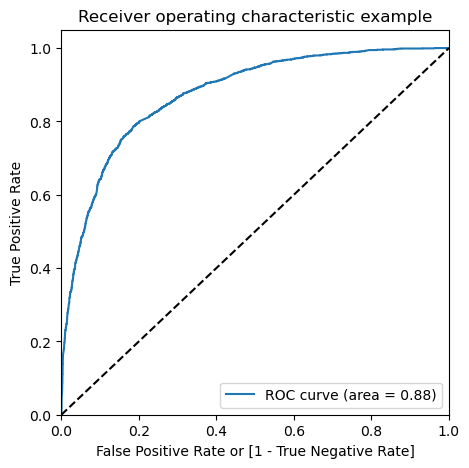

In [425]:
draw_roc(y_train_pred_final['Conv'], y_train_pred_final['Conv_Prob'])

### **11.10** : Finding Optimal Cutoff Point

_Optimal cutoff probability is that prob where we get balanced sensitivity and specificity_

In [432]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Conv_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Conv,Conv_Prob,Indexed,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.020986,4248,0,1,0,0,0,0,0,0,0,0,0
1,0.0,0.049734,1034,0,1,0,0,0,0,0,0,0,0,0
2,0.0,0.624473,8493,1,1,1,1,1,1,1,1,0,0,0
3,1.0,0.885626,475,1,1,1,1,1,1,1,1,1,1,0
4,1.0,0.558398,1381,1,1,1,1,1,1,1,0,0,0,0


In [434]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Conv'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.397554  1.000000  0.000000
0.1   0.1  0.593567  0.979772  0.338710
0.2   0.2  0.720891  0.911083  0.595384
0.3   0.3  0.774502  0.847029  0.726641
0.4   0.4  0.804992  0.766119  0.830645
0.5   0.5  0.805328  0.692373  0.879867
0.6   0.6  0.787234  0.598399  0.911846
0.7   0.7  0.767130  0.504425  0.940489
0.8   0.8  0.739487  0.394859  0.966908
0.9   0.9  0.689228  0.235567  0.988598


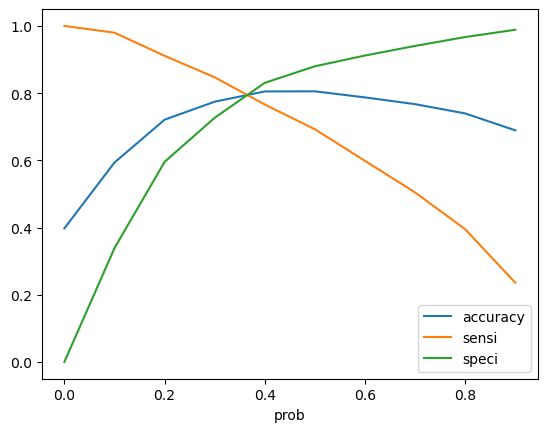

In [436]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [438]:
# Example DataFrame (replace this with your actual data)
cutoff_df = Lead_data

# Step 1: Calculate Youden's Index
cutoff_df['youden_index'] = cutoff_df['sensi'] + cutoff_df['speci'] - 1

# Step 2: Find the probability that maximizes Youden's Index
optimal_cutoff = cutoff_df.loc[cutoff_df['youden_index'].idxmax(), 'prob']

# Step 3: Plot accuracy, sensitivity, and specificity
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])

# Step 4: Add a vertical dotted line at the optimal cutoff probability
plt.axvline(x=optimal_cutoff, color='red', linestyle='--', label=f'Optimal Cutoff = {optimal_cutoff:.2f}')

# Add labels and legend
plt.xlabel('Probability')
plt.ylabel('Values')
plt.legend()
plt.title('Accuracy, Sensitivity, and Specificity vs. Probability')

# Show the plot
plt.show()


KeyError: 'sensi'

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

In [ ]:
# Positive predictive value 
print (TP / float(TP+FP))


In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))


## Precision and Recall

In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

In [ ]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

In [ ]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

# Using sklearn utilities for the same

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

In [ ]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

### Precision and recall tradeoff

In [ ]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Churn, y_train_pred_final.predicted

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.legend('auto')
plt.show()


# Making predictions on the test set¶

In [296]:
# adas

<a id="12"></a><h1 style='background:#e3e3e1; color:Black'><Left><br> [12. <u>Model Building using Random 
Forest](#0) </br></Left></h1>

### **12.1** : Splitting Data into Training set and Test set.
As you know, the first basic step for regression is performing a train-test split.

In [298]:
# Putting feature variable to X
X = Lead_data_scaled.drop(['Converted'], axis=1)

# Putting Target variable to y
y = Lead_data_scaled['Converted']

In [300]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
X_train.shape , X_test.shape

((5969, 31), (1990, 31))

## Random Forest

In [302]:
# Importing RandomForestClassifier Library
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=50, n_estimators=100, max_depth=6, oob_score=True)
rf

RandomForestClassifier(max_depth=6, oob_score=True, random_state=50)

In [304]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, oob_score=True, random_state=50)

In [305]:
rf.oob_score_

0.809348299547663

In [308]:
# Importing Library
from sklearn.metrics import classification_report

y_train_pred = rf.predict(X_train)
print(classification_report(y_train, y_train_pred))



              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85      3596
         1.0       0.79      0.73      0.76      2373

    accuracy                           0.82      5969
   macro avg       0.81      0.80      0.80      5969
weighted avg       0.81      0.82      0.81      5969



In [310]:
# Checking performance of Model on Test set
y_test_pred = rf.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84      1180
         1.0       0.80      0.69      0.74       810

    accuracy                           0.80      1990
   macro avg       0.80      0.79      0.79      1990
weighted avg       0.80      0.80      0.80      1990



In [312]:
# Feature Importances
importances = rf.feature_importances_
feature_names = X_test.columns
for feature, importance in zip(feature_names, importances):
    print(f"Feature: {feature}, Importance: {importance:.4f}")

Feature: TotalVisits, Importance: 0.0324
Feature: Total Time Spent on Website, Importance: 0.3471
Feature: Page Views Per Visit, Importance: 0.0322
Feature: Lead Origin_LANDING PAGE SUBMISSION, Importance: 0.0150
Feature: Lead Origin_LEAD ADD FORM, Importance: 0.0909
Feature: Lead Origin_LEAD IMPORT, Importance: 0.0012
Feature: Lead Origin_QUICK ADD FORM, Importance: 0.0000
Feature: Do Not Email_YES, Importance: 0.0253
Feature: What is your current occupation_HOUSEWIFE, Importance: 0.0006
Feature: What is your current occupation_OTHER, Importance: 0.0769
Feature: What is your current occupation_STUDENT, Importance: 0.0037
Feature: What is your current occupation_UNEMPLOYED, Importance: 0.0294
Feature: What is your current occupation_WORKING PROFESSIONAL, Importance: 0.1220
Feature: What matters most to you in choosing a course_OTHER, Importance: 0.0858
Feature: A free copy of Mastering The Interview_YES, Importance: 0.0043
Feature: Grouped_Specialization_Healthcare, Importance: 0.0008


## Applying Grid Search

In [335]:
GS_rf = RandomForestClassifier(random_state=50, n_jobs=-1, oob_score=True)

In [337]:
# Creating Parameter
params = {
    'max_depth':[3,5,15,20,25,30],
    'min_samples_leaf':[5,7,10,12,15,20],
    'max_features':[2,3,4,5,6,7,8,10],
    'n_estimators':[20,26,30,33,35,40,50]
}

In [339]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=GS_rf, param_grid=params, 
                           cv=4, n_jobs= -1, verbose=1, scoring='f1')

In [343]:
import time
start_time = time.time()

In [345]:
grid_search.fit(X_train, y_train)

# Calculate and print execution time
end_time = time.time()
execution_time = (end_time - start_time)/60
print(f"Random Forest execution time: {execution_time} mins") 


Fitting 4 folds for each of 2016 candidates, totalling 8064 fits
Random Forest execution time: 17.252162623405457 seconds


In [346]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=20, max_features=10, min_samples_leaf=12,
                       n_estimators=40, n_jobs=-1, oob_score=True,
                       random_state=50)

In [349]:
GS_rf = grid_search.best_estimator_

In [351]:
GS_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, max_features=10, min_samples_leaf=12,
                       n_estimators=40, n_jobs=-1, oob_score=True,
                       random_state=50)

In [355]:
GS_rf.oob_score_

0.8105210252973697

In [359]:
# Checking performance of Model on Train set
y_train_pred = rf.predict(X_train)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85      3596
         1.0       0.79      0.73      0.76      2373

    accuracy                           0.82      5969
   macro avg       0.81      0.80      0.80      5969
weighted avg       0.81      0.82      0.81      5969



In [357]:
# Checking performance of Model on Test set
y_test_pred = rf.predict(X_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84      1180
         1.0       0.80      0.69      0.74       810

    accuracy                           0.80      1990
   macro avg       0.80      0.79      0.79      1990
weighted avg       0.80      0.80      0.80      1990



### Variable importance in RandomForest and Decision trees

In [367]:
# Checking `feature_importances` using GS_rf Model 
GS_rf.feature_importances_

array([4.51413878e-02, 4.51628915e-01, 3.70295237e-02, 8.55040915e-03,
       1.10564654e-01, 0.00000000e+00, 0.00000000e+00, 1.44170048e-02,
       0.00000000e+00, 3.42816322e-02, 1.95895087e-03, 2.87535582e-02,
       9.35213691e-02, 5.70912504e-02, 6.38325797e-03, 6.10157099e-05,
       1.89426687e-03, 1.15860099e-02, 2.24605350e-04, 2.06808029e-02,
       1.44810370e-03, 5.39540648e-04, 7.86238118e-03, 4.22670567e-02,
       6.90283666e-04, 2.74720655e-03, 1.02105049e-02, 0.00000000e+00,
       5.80325147e-03, 2.86465361e-04, 4.37659184e-03])

In [1]:
imp_df = pd.DataFrame({
    "Varname": X_test.columns,
    "Imp": rf.feature_importances_
})

NameError: name 'pd' is not defined

In [371]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
1,Total Time Spent on Website,0.347129
12,What is your current occupation_WORKING PROFES...,0.122034
4,Lead Origin_LEAD ADD FORM,0.090931
13,What matters most to you in choosing a course_...,0.085788
9,What is your current occupation_OTHER,0.076920
23,Grouped_Activity_Messaging Activity,0.056377
0,TotalVisits,0.032397
2,Page Views Per Visit,0.032212
11,What is your current occupation_UNEMPLOYED,0.029445
7,Do Not Email_YES,0.025343


<a id="13"></a><h1 style='background:#e3e3e1; color:Black'><Left><br> [13. <u>Model Building using Custom Ensemble Models](#0) </br></Left></h1>